In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Exploratory Data Analysis (EDA)**

In [3]:
#Importing the needed libraries

import pandas as pd
import numpy as np
import os


Loading the Data Paths

In [4]:
#directory containing the data files
data_dir = '/content/drive/MyDrive/K2_DataScience'

# List the files in the directory
files = os.listdir(data_dir)
print(files)

# Load the datasets into pandas DataFrames
train_file_path = os.path.join(data_dir, 'Train-1542865627584.csv')
beneficiary_file_path = os.path.join(data_dir, 'Train_Beneficiarydata-1542865627584.csv')
inpatient_file_path = os.path.join(data_dir, 'Train_Inpatientdata-1542865627584.csv')
outpatient_file_path = os.path.join(data_dir, 'Train_Outpatientdata-1542865627584.csv')

train_df = pd.read_csv(train_file_path)
beneficiary_df = pd.read_csv(beneficiary_file_path)
inpatient_df = pd.read_csv(inpatient_file_path)
outpatient_df = pd.read_csv(outpatient_file_path)


['Health Claims.zip', 'Train_Inpatientdata-1542865627584.csv', 'Test_Outpatientdata-1542969243754.csv', 'Test_Beneficiarydata-1542969243754.csv', 'Train_Beneficiarydata-1542865627584.csv', 'Test_Inpatientdata-1542969243754.csv', 'Train-1542865627584.csv', 'Train_Outpatientdata-1542865627584.csv', 'Cleaned_Train.csv', 'Cleaned_Inpatient.csv', 'Cleaned_Beneficiary.csv', 'Cleaned_Outpatient.csv']


In [5]:
# Display the first few rows of each DataFrame
print("Train DataFrame:")
print(train_df.head())

Train DataFrame:
   Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No


In [6]:
print("\nBeneficiary DataFrame:")
print(beneficiary_df.head())


Beneficiary DataFrame:
      BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   
2     590                   12                   12  ...   
3     270                   12                   12  ...   
4     680                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1 

In [7]:


print("\nInpatient DataFrame:")
print(inpatient_df.head())




Inpatient DataFrame:
      BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt  ... ClmDiagnosisCode_7  ClmDiagnosisCode_8  \
0            NaN  2009-04-12  ...               2724               19889   
1            NaN  2009-08-31  ...                NaN    

In [8]:
print("\nOutpatient DataFrame:")
print(outpatient_df.head())


Outpatient DataFrame:
      BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ClmDiagnosisCode_9  \
0            NaN              78943  ...                NaN   
1            NaN               6115  ...                NaN   
2           

# **Describing of the all four Data Sets**

In [9]:
# Display summary statistics
print("\nTrain DataFrame Summary:")
print(train_df.describe())




Train DataFrame Summary:
        Provider PotentialFraud
count       5410           5410
unique      5410              2
top     PRV51001             No
freq           1           4904


In [10]:
print("\nBeneficiary DataFrame Summary:")
print(beneficiary_df.describe())




Beneficiary DataFrame Summary:
              Gender           Race          State         County  \
count  138556.000000  138556.000000  138556.000000  138556.000000   
mean        1.570932       1.254511      25.666734     374.424745   
std         0.494945       0.717007      15.223443     266.277581   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000       1.000000      11.000000     141.000000   
50%         2.000000       1.000000      25.000000     340.000000   
75%         2.000000       1.000000      39.000000     570.000000   
max         2.000000       5.000000      54.000000     999.000000   

       NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
count        138556.000000        138556.000000          138556.000000   
mean             11.907727            11.910145               1.667817   
std               1.032332             0.936893               0.470998   
min               0.000000             0.000000   

In [11]:


print("\nInpatient DataFrame Summary:")
print(inpatient_df.describe())




Inpatient DataFrame Summary:
       InscClaimAmtReimbursed  DeductibleAmtPaid  ClmProcedureCode_1  \
count            40474.000000            39575.0        23148.000000   
mean             10087.884074             1068.0         5894.611759   
std              10303.099402                0.0         3049.304400   
min                  0.000000             1068.0           11.000000   
25%               4000.000000             1068.0         3848.000000   
50%               7000.000000             1068.0         5369.000000   
75%              12000.000000             1068.0         8666.250000   
max             125000.000000             1068.0         9999.000000   

       ClmProcedureCode_2  ClmProcedureCode_3  ClmProcedureCode_4  \
count         5454.000000          965.000000          116.000000   
mean          4103.738174         4226.355440         4070.172414   
std           2028.182156         2282.761581         1994.409802   
min             42.000000           42.000000

In [12]:


print("\nOutpatient DataFrame Summary:")
print(outpatient_df.describe())


Outpatient DataFrame Summary:
       InscClaimAmtReimbursed  ClmProcedureCode_1  ClmProcedureCode_2  \
count           517737.000000          162.000000           36.000000   
mean               286.334799         6116.611111         4503.277778   
std                694.034343         3217.719258         2504.015000   
min                  0.000000           51.000000          412.000000   
25%                 40.000000         3893.000000         2724.000000   
50%                 80.000000         5244.500000         4019.000000   
75%                200.000000         9421.500000         5849.000000   
max             102500.000000         9999.000000         9982.000000   

       ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
count            4.000000            2.000000                 0.0   
mean          2959.000000         4075.500000                 NaN   
std           1863.455393         5323.806956                 NaN   
min            412.000000          

In [13]:
# Summary statistics for Train DataFrame
train_summary = train_df.describe()

# Summary statistics for Beneficiary DataFrame
beneficiary_summary = beneficiary_df.describe()

# Summary statistics for Inpatient DataFrame
inpatient_summary = inpatient_df.describe()

# Summary statistics for Outpatient DataFrame
outpatient_summary = outpatient_df.describe()

# Display the summary statistics
print("Train DataFrame - Summary Statistics")
print(train_summary)

print("\nBeneficiary DataFrame - Summary Statistics")
print(beneficiary_summary)

print("\nInpatient DataFrame - Summary Statistics")
print(inpatient_summary)

print("\nOutpatient DataFrame - Summary Statistics")
print(outpatient_summary)


Train DataFrame - Summary Statistics
        Provider PotentialFraud
count       5410           5410
unique      5410              2
top     PRV51001             No
freq           1           4904

Beneficiary DataFrame - Summary Statistics
              Gender           Race          State         County  \
count  138556.000000  138556.000000  138556.000000  138556.000000   
mean        1.570932       1.254511      25.666734     374.424745   
std         0.494945       0.717007      15.223443     266.277581   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000       1.000000      11.000000     141.000000   
50%         2.000000       1.000000      25.000000     340.000000   
75%         2.000000       1.000000      39.000000     570.000000   
max         2.000000       5.000000      54.000000     999.000000   

       NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
count        138556.000000        138556.000000          138556

# **Checking the Missing Values**

In [14]:
# Display the first few rows and summary statistics of each DataFrame
dataframes = {'Train DataFrame': train_df, 'Beneficiary DataFrame': beneficiary_df, 'Inpatient DataFrame': inpatient_df, 'Outpatient DataFrame': outpatient_df}

for name, df in dataframes.items():
    print(f"\n{name}:")
    print(df.head())
    print("\nSummary Statistics:")
    print(df.describe())



Train DataFrame:
   Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No

Summary Statistics:
        Provider PotentialFraud
count       5410           5410
unique      5410              2
top     PRV51001             No
freq           1           4904

Beneficiary DataFrame:
      BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12        

In [15]:
# Checking for missing values in each DataFrame
for name, df in dataframes.items():
    print(f"\nMissing values in {name}:")
    print(df.isnull().sum())


Missing values in Train DataFrame:
Provider          0
PotentialFraud    0
dtype: int64

Missing values in Beneficiary DataFrame:
BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke           

In [16]:
# Define a threshold for removing columns with too many missing values
threshold = 0.5

# Remove columns with more than 50% missing values
for name, df in dataframes.items():
    missing_fraction = df.isnull().mean()
    columns_to_drop = missing_fraction[missing_fraction > threshold].index
    df.drop(columns=columns_to_drop, inplace=True)
    print(f"\n{name} - Columns dropped due to high percentage of missing values:")
    print(columns_to_drop)



Train DataFrame - Columns dropped due to high percentage of missing values:
Index([], dtype='object')

Beneficiary DataFrame - Columns dropped due to high percentage of missing values:
Index(['DOD'], dtype='object')

Inpatient DataFrame - Columns dropped due to high percentage of missing values:
Index(['OtherPhysician', 'ClmDiagnosisCode_10', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

Outpatient DataFrame - Columns dropped due to high percentage of missing values:
Index(['OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'ClmAdmitDiagnosisCode'],
      dt

In [17]:
# Impute missing values for numerical columns with the mean
for name, df in dataframes.items():
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    for column in numerical_columns:
        if df[column].isnull().sum() > 0:
            df[column].fillna(df[column].mean(), inplace=True)
    print(f"\n{name} - Missing values in numerical columns imputed with mean")

# Impute missing values for categorical columns with the mode
for name, df in dataframes.items():
    categorical_columns = df.select_dtypes(include=[object]).columns
    for column in categorical_columns:
        if df[column].isnull().sum() > 0:
            df[column].fillna(df[column].mode()[0], inplace=True)
    print(f"\n{name} - Missing values in categorical columns imputed with mode")



Train DataFrame - Missing values in numerical columns imputed with mean

Beneficiary DataFrame - Missing values in numerical columns imputed with mean

Inpatient DataFrame - Missing values in numerical columns imputed with mean

Outpatient DataFrame - Missing values in numerical columns imputed with mean

Train DataFrame - Missing values in categorical columns imputed with mode

Beneficiary DataFrame - Missing values in categorical columns imputed with mode

Inpatient DataFrame - Missing values in categorical columns imputed with mode

Outpatient DataFrame - Missing values in categorical columns imputed with mode


In [18]:
# Verify that missing values have been handled
for name, df in dataframes.items():
    print(f"\n{name} - Missing values after handling:")
    print(df.isnull().sum())





Train DataFrame - Missing values after handling:
Provider          0
PotentialFraud    0
dtype: int64

Beneficiary DataFrame - Missing values after handling:
BeneID                             0
DOB                                0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt   

# Outliers

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to handle outliers using IQR method
def handle_outliers(df):
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Function to check date inconsistencies
def check_date_inconsistencies(df):
    if 'ClaimStartDt' in df.columns and 'ClaimEndDt' in df.columns:
        inconsistent_dates = df[df['ClaimStartDt'] > df['ClaimEndDt']]
        return inconsistent_dates
    return pd.DataFrame()

# Load the dataset
data_dir = '/content/drive/MyDrive/K2_DataScience'
train_file_path = os.path.join(data_dir, 'Train-1542865627584.csv')
beneficiary_file_path = os.path.join(data_dir, 'Train_Beneficiarydata-1542865627584.csv')
inpatient_file_path = os.path.join(data_dir, 'Train_Inpatientdata-1542865627584.csv')
outpatient_file_path = os.path.join(data_dir, 'Train_Outpatientdata-1542865627584.csv')

train_df = pd.read_csv(train_file_path)
beneficiary_df = pd.read_csv(beneficiary_file_path)
inpatient_df = pd.read_csv(inpatient_file_path)
outpatient_df = pd.read_csv(outpatient_file_path)

# Handle outliers
train_df = handle_outliers(train_df)
beneficiary_df = handle_outliers(beneficiary_df)
inpatient_df = handle_outliers(inpatient_df)
outpatient_df = handle_outliers(outpatient_df)

print("Train DataFrame - Outliers handled")
print("Beneficiary DataFrame - Outliers handled")
print("Inpatient DataFrame - Outliers handled")
print("Outpatient DataFrame - Outliers handled")

# Check for date inconsistencies
inpatient_date_inconsistencies = check_date_inconsistencies(inpatient_df)
outpatient_date_inconsistencies = check_date_inconsistencies(outpatient_df)

print("Inpatient DataFrame - Date inconsistencies:")
print(inpatient_date_inconsistencies)

print("Outpatient DataFrame - Date inconsistencies:")
print(outpatient_date_inconsistencies)

# Save cleaned data
train_df.to_csv(os.path.join(data_dir, 'Cleaned_Train.csv'), index=False)
beneficiary_df.to_csv(os.path.join(data_dir, 'Cleaned_Beneficiary.csv'), index=False)
inpatient_df.to_csv(os.path.join(data_dir, 'Cleaned_Inpatient.csv'), index=False)
outpatient_df.to_csv(os.path.join(data_dir, 'Cleaned_Outpatient.csv'), index=False)


Train DataFrame - Outliers handled
Beneficiary DataFrame - Outliers handled
Inpatient DataFrame - Outliers handled
Outpatient DataFrame - Outliers handled
Inpatient DataFrame - Date inconsistencies:
Empty DataFrame
Columns: [BeneID, ClaimID, ClaimStartDt, ClaimEndDt, Provider, InscClaimAmtReimbursed, AttendingPhysician, OperatingPhysician, OtherPhysician, AdmissionDt, ClmAdmitDiagnosisCode, DeductibleAmtPaid, DischargeDt, DiagnosisGroupCode, ClmDiagnosisCode_1, ClmDiagnosisCode_2, ClmDiagnosisCode_3, ClmDiagnosisCode_4, ClmDiagnosisCode_5, ClmDiagnosisCode_6, ClmDiagnosisCode_7, ClmDiagnosisCode_8, ClmDiagnosisCode_9, ClmDiagnosisCode_10, ClmProcedureCode_1, ClmProcedureCode_2, ClmProcedureCode_3, ClmProcedureCode_4, ClmProcedureCode_5, ClmProcedureCode_6]
Index: []

[0 rows x 30 columns]
Outpatient DataFrame - Date inconsistencies:
Empty DataFrame
Columns: [BeneID, ClaimID, ClaimStartDt, ClaimEndDt, Provider, InscClaimAmtReimbursed, AttendingPhysician, OperatingPhysician, OtherPhysici

# **Data Exploration**

In [20]:
# Summary statistics for numerical columns
for name, df in dataframes.items():
    print(f"\n{name} - Summary Statistics:")
    print(df.describe())



Train DataFrame - Summary Statistics:
        Provider PotentialFraud
count       5410           5410
unique      5410              2
top     PRV51001             No
freq           1           4904

Beneficiary DataFrame - Summary Statistics:
              Gender           Race          State         County  \
count  138556.000000  138556.000000  138556.000000  138556.000000   
mean        1.570932       1.254511      25.666734     374.424745   
std         0.494945       0.717007      15.223443     266.277581   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000       1.000000      11.000000     141.000000   
50%         2.000000       1.000000      25.000000     340.000000   
75%         2.000000       1.000000      39.000000     570.000000   
max         2.000000       5.000000      54.000000     999.000000   

       NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
count        138556.000000        138556.000000          138

In [21]:
# import pandas as pd

# # Load the datasets
# inpatient_data = pd.read_csv('/content/drive/MyDrive/Health Claims/Train_Inpatientdata-1542865627584.csv')
# outpatient_data = pd.read_csv('/content/drive/MyDrive/Health Claims/Train_Outpatientdata-1542865627584.csv')
# beneficiary_data = pd.read_csv('/content/drive/MyDrive/Health Claims/Train_Beneficiarydata-1542865627584.csv')

# # Check for missing values
# print("Missing values in Inpatient Data:")
# print(inpatient_data.isnull().sum())

# print("\nMissing values in Outpatient Data:")
# print(outpatient_data.isnull().sum())

# print("\nMissing values in Beneficiary Data:")
# print(beneficiary_data.isnull().sum())

# # Fill or drop missing values if necessary
# inpatient_data.fillna(method='ffill', inplace=True)
# outpatient_data.fillna(method='ffill', inplace=True)
# beneficiary_data.fillna(method='ffill', inplace=True)


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

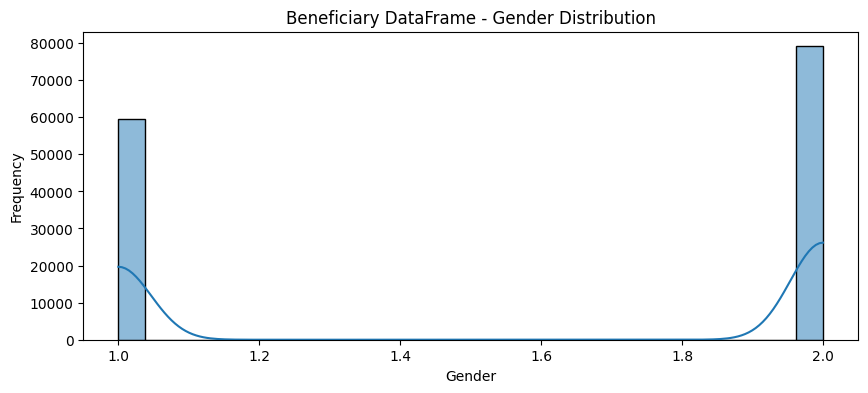

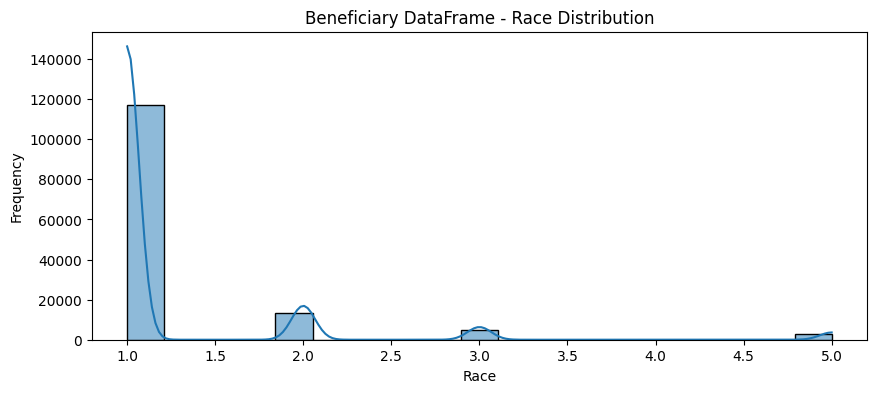

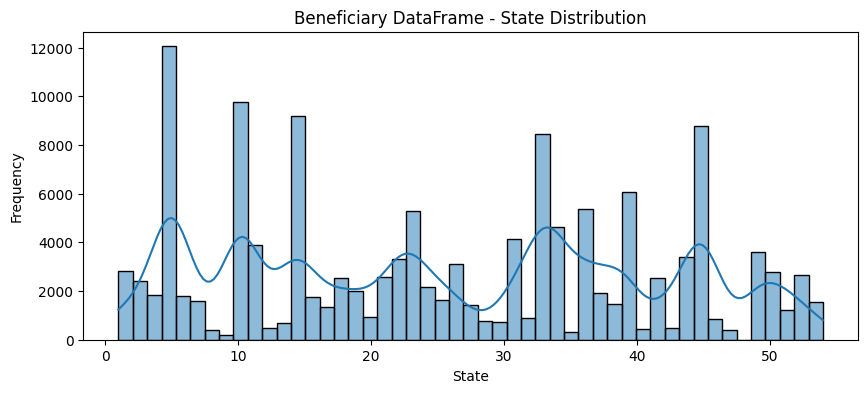

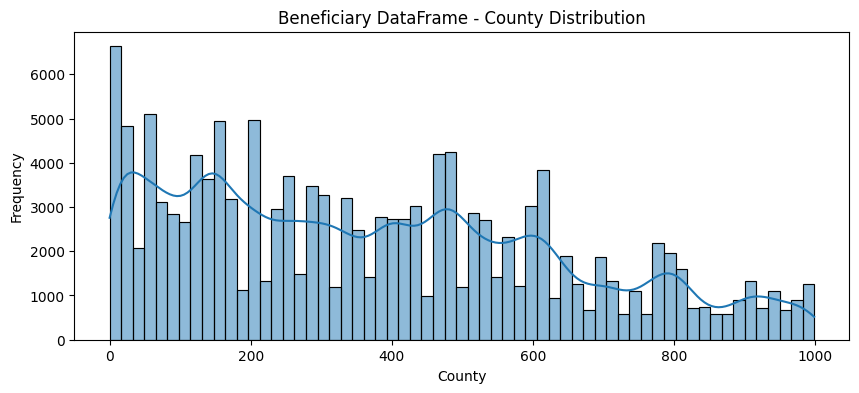

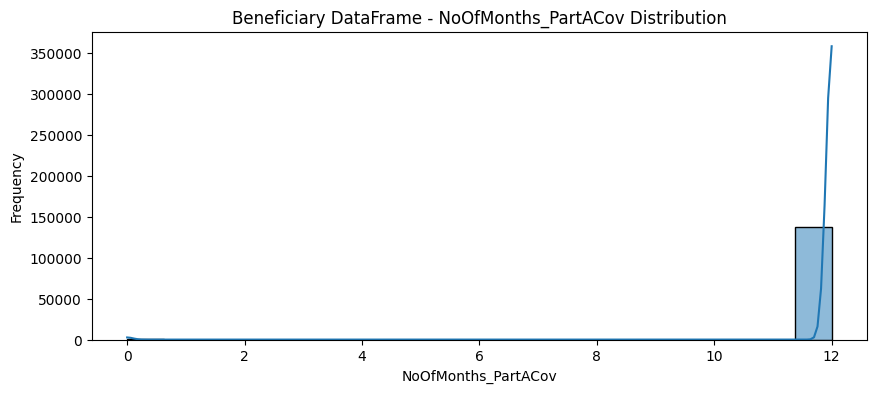

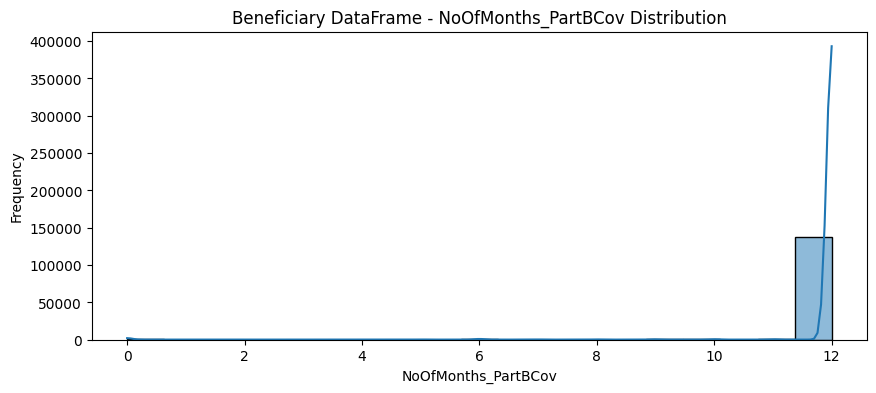

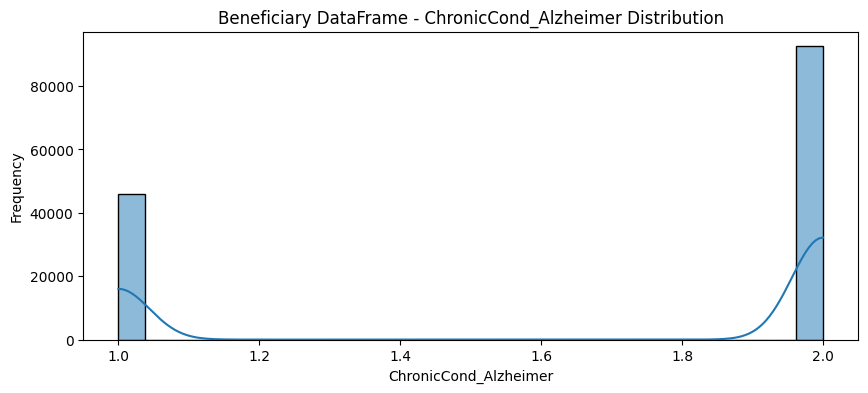

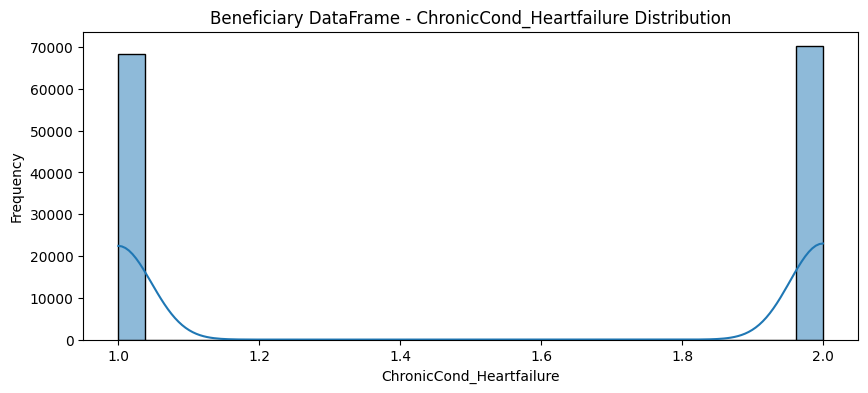

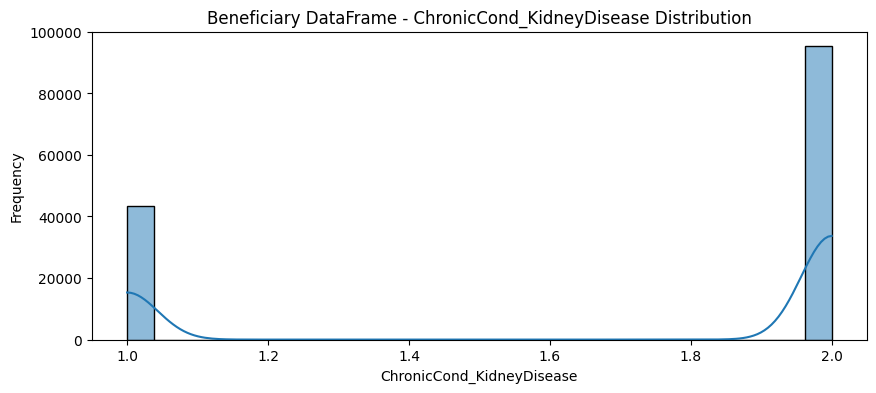

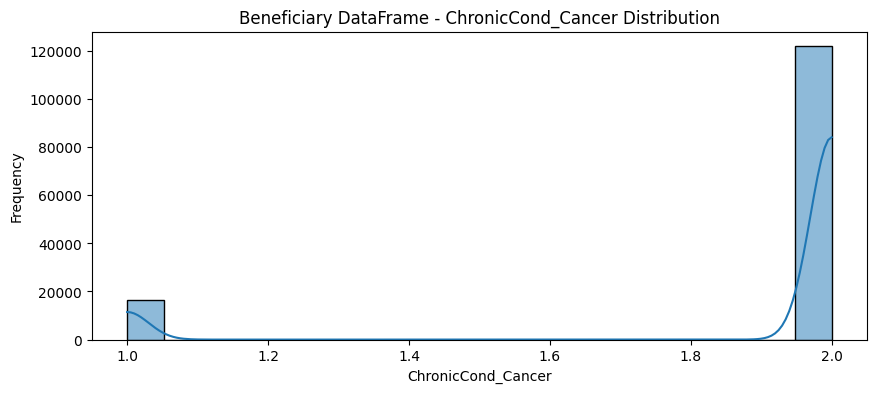

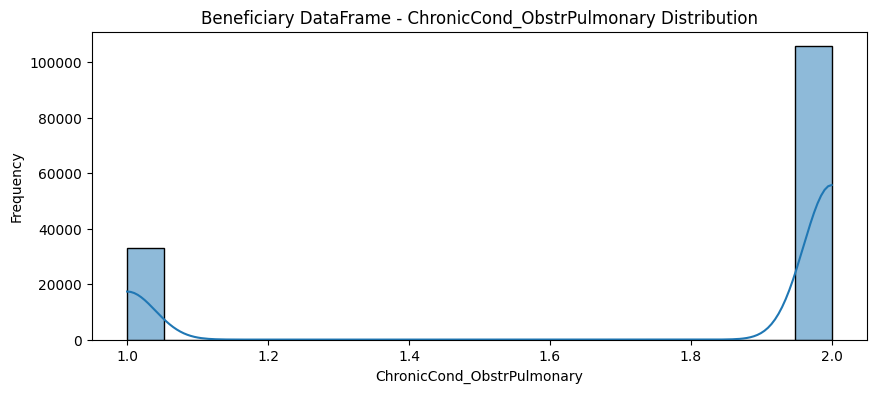

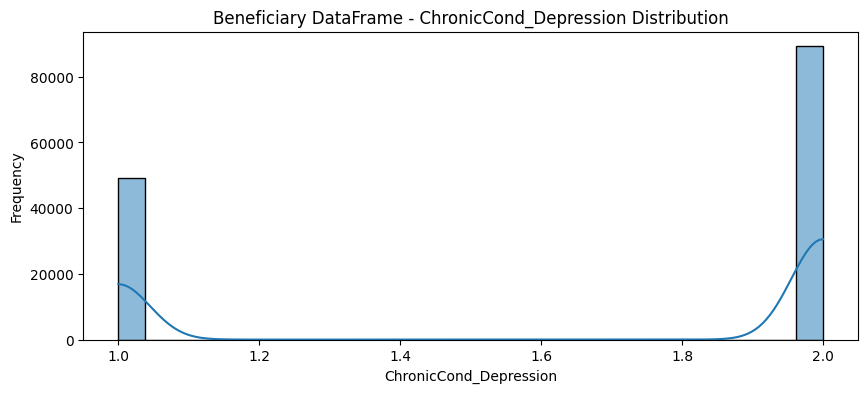

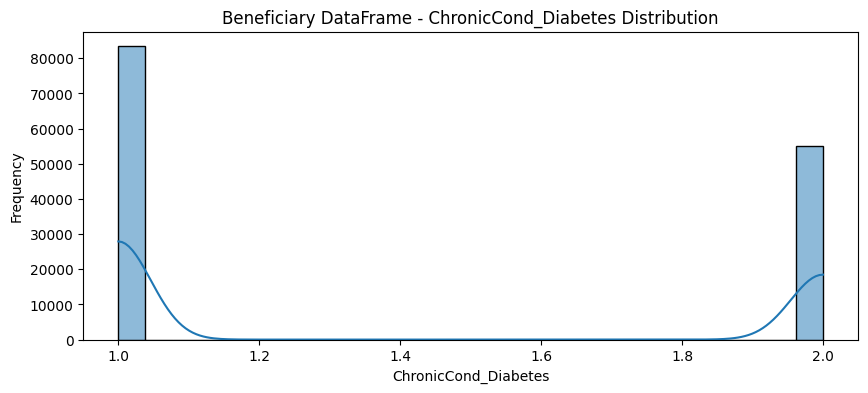

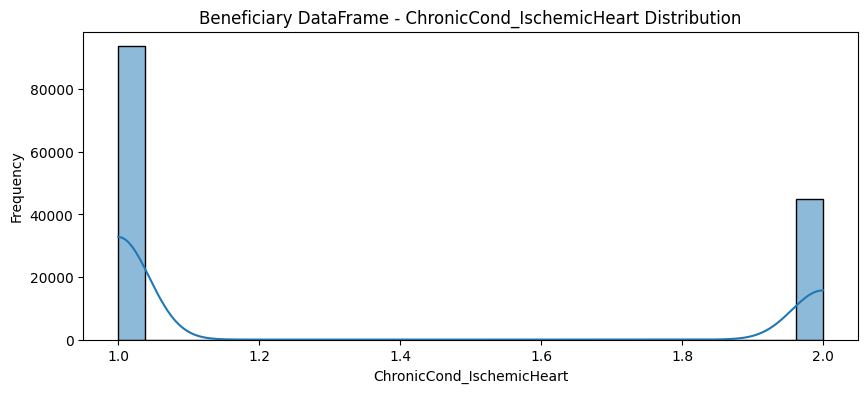

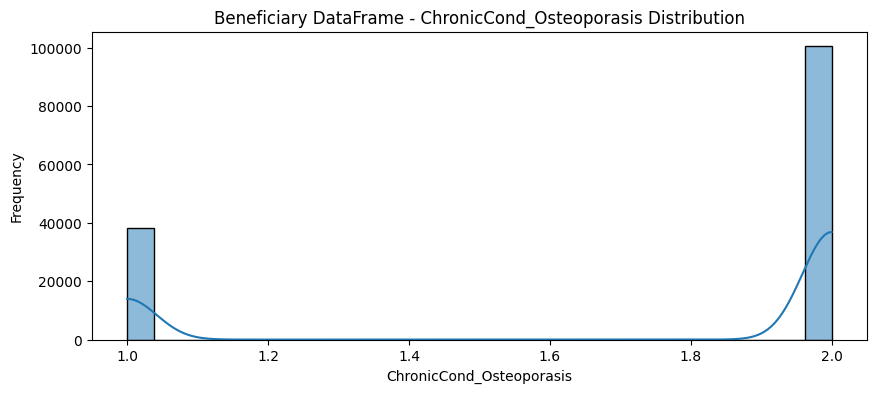

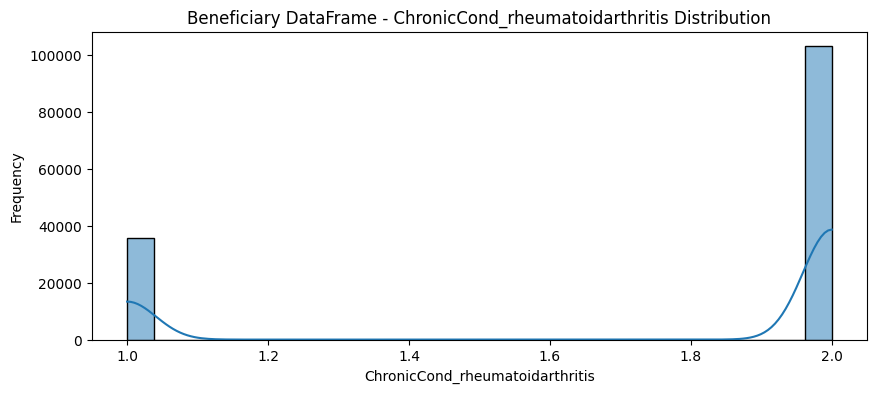

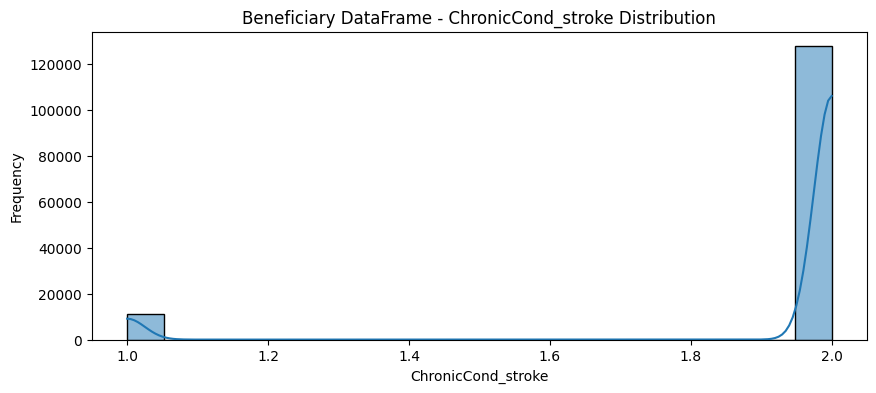

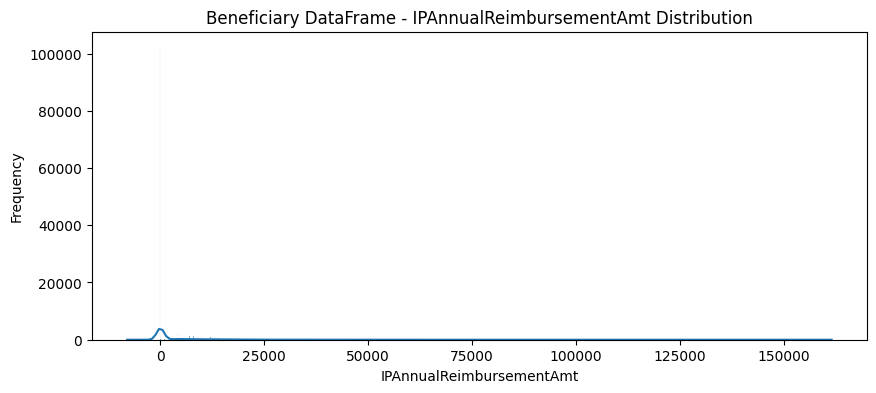

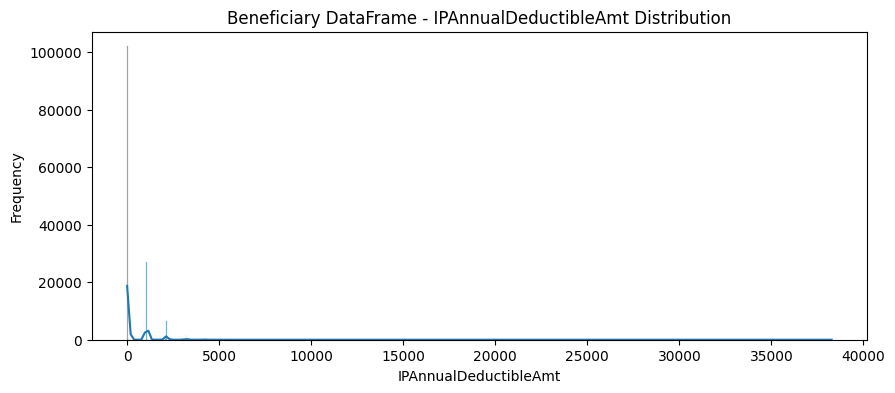

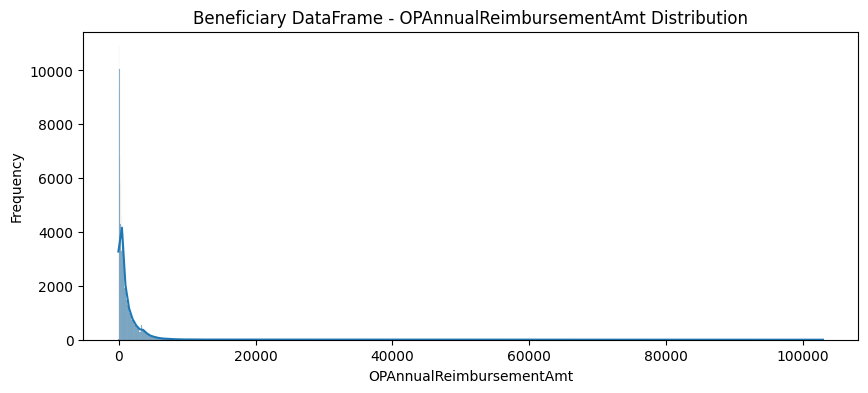

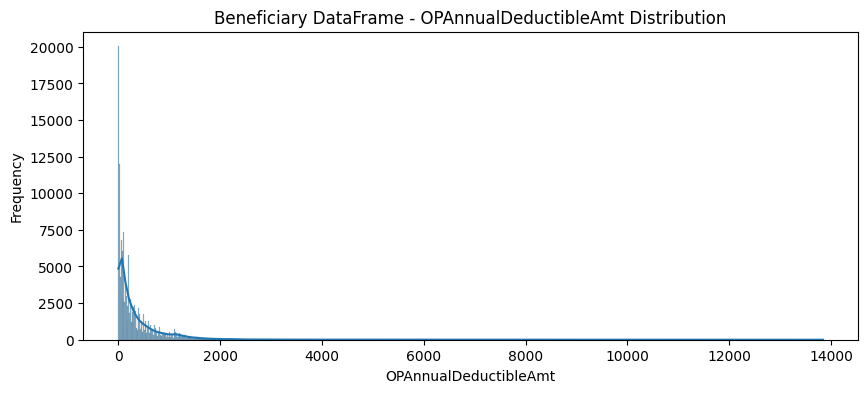

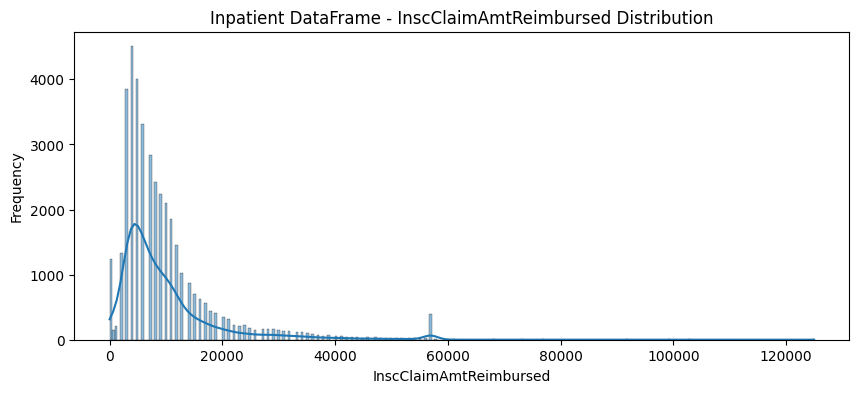

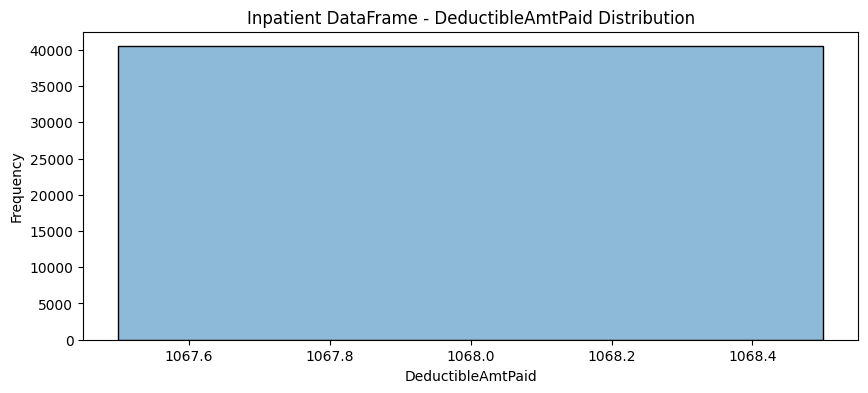

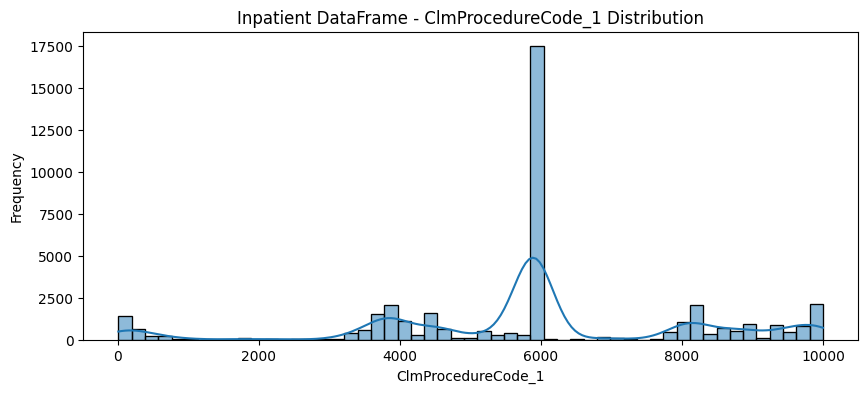

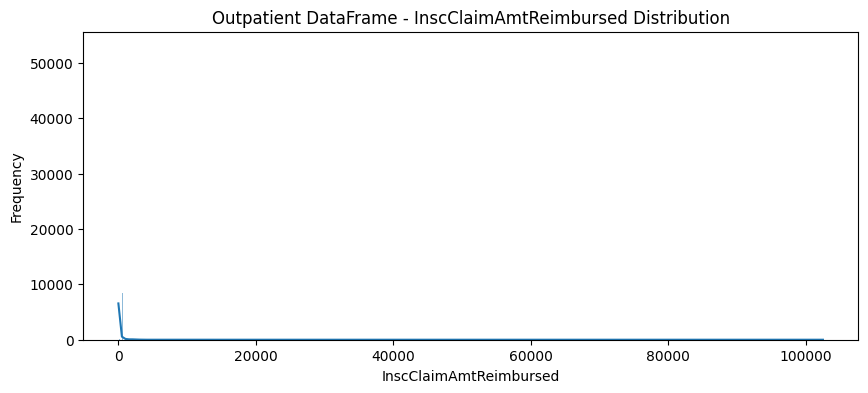

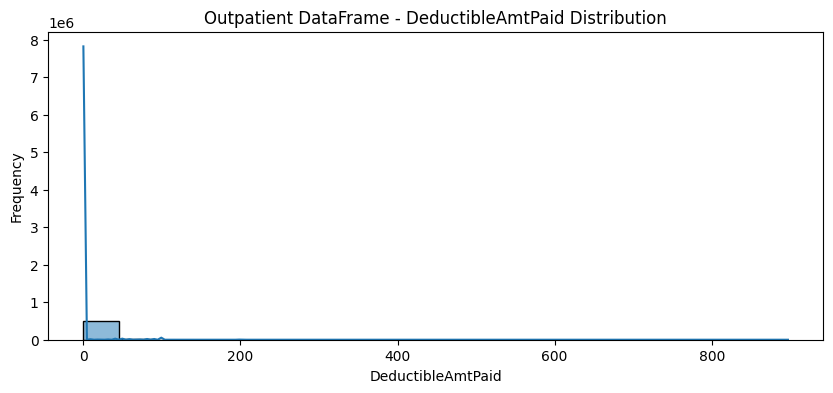

In [23]:


# Distribution plots for numerical columns
for name, df in dataframes.items():
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    for column in numerical_columns:
        plt.figure(figsize=(10, 4))
        sns.histplot(df[column], kde=True)
        plt.title(f'{name} - {column} Distribution')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


# **Bi-Variate Analysis**

<Figure size 1200x1000 with 0 Axes>

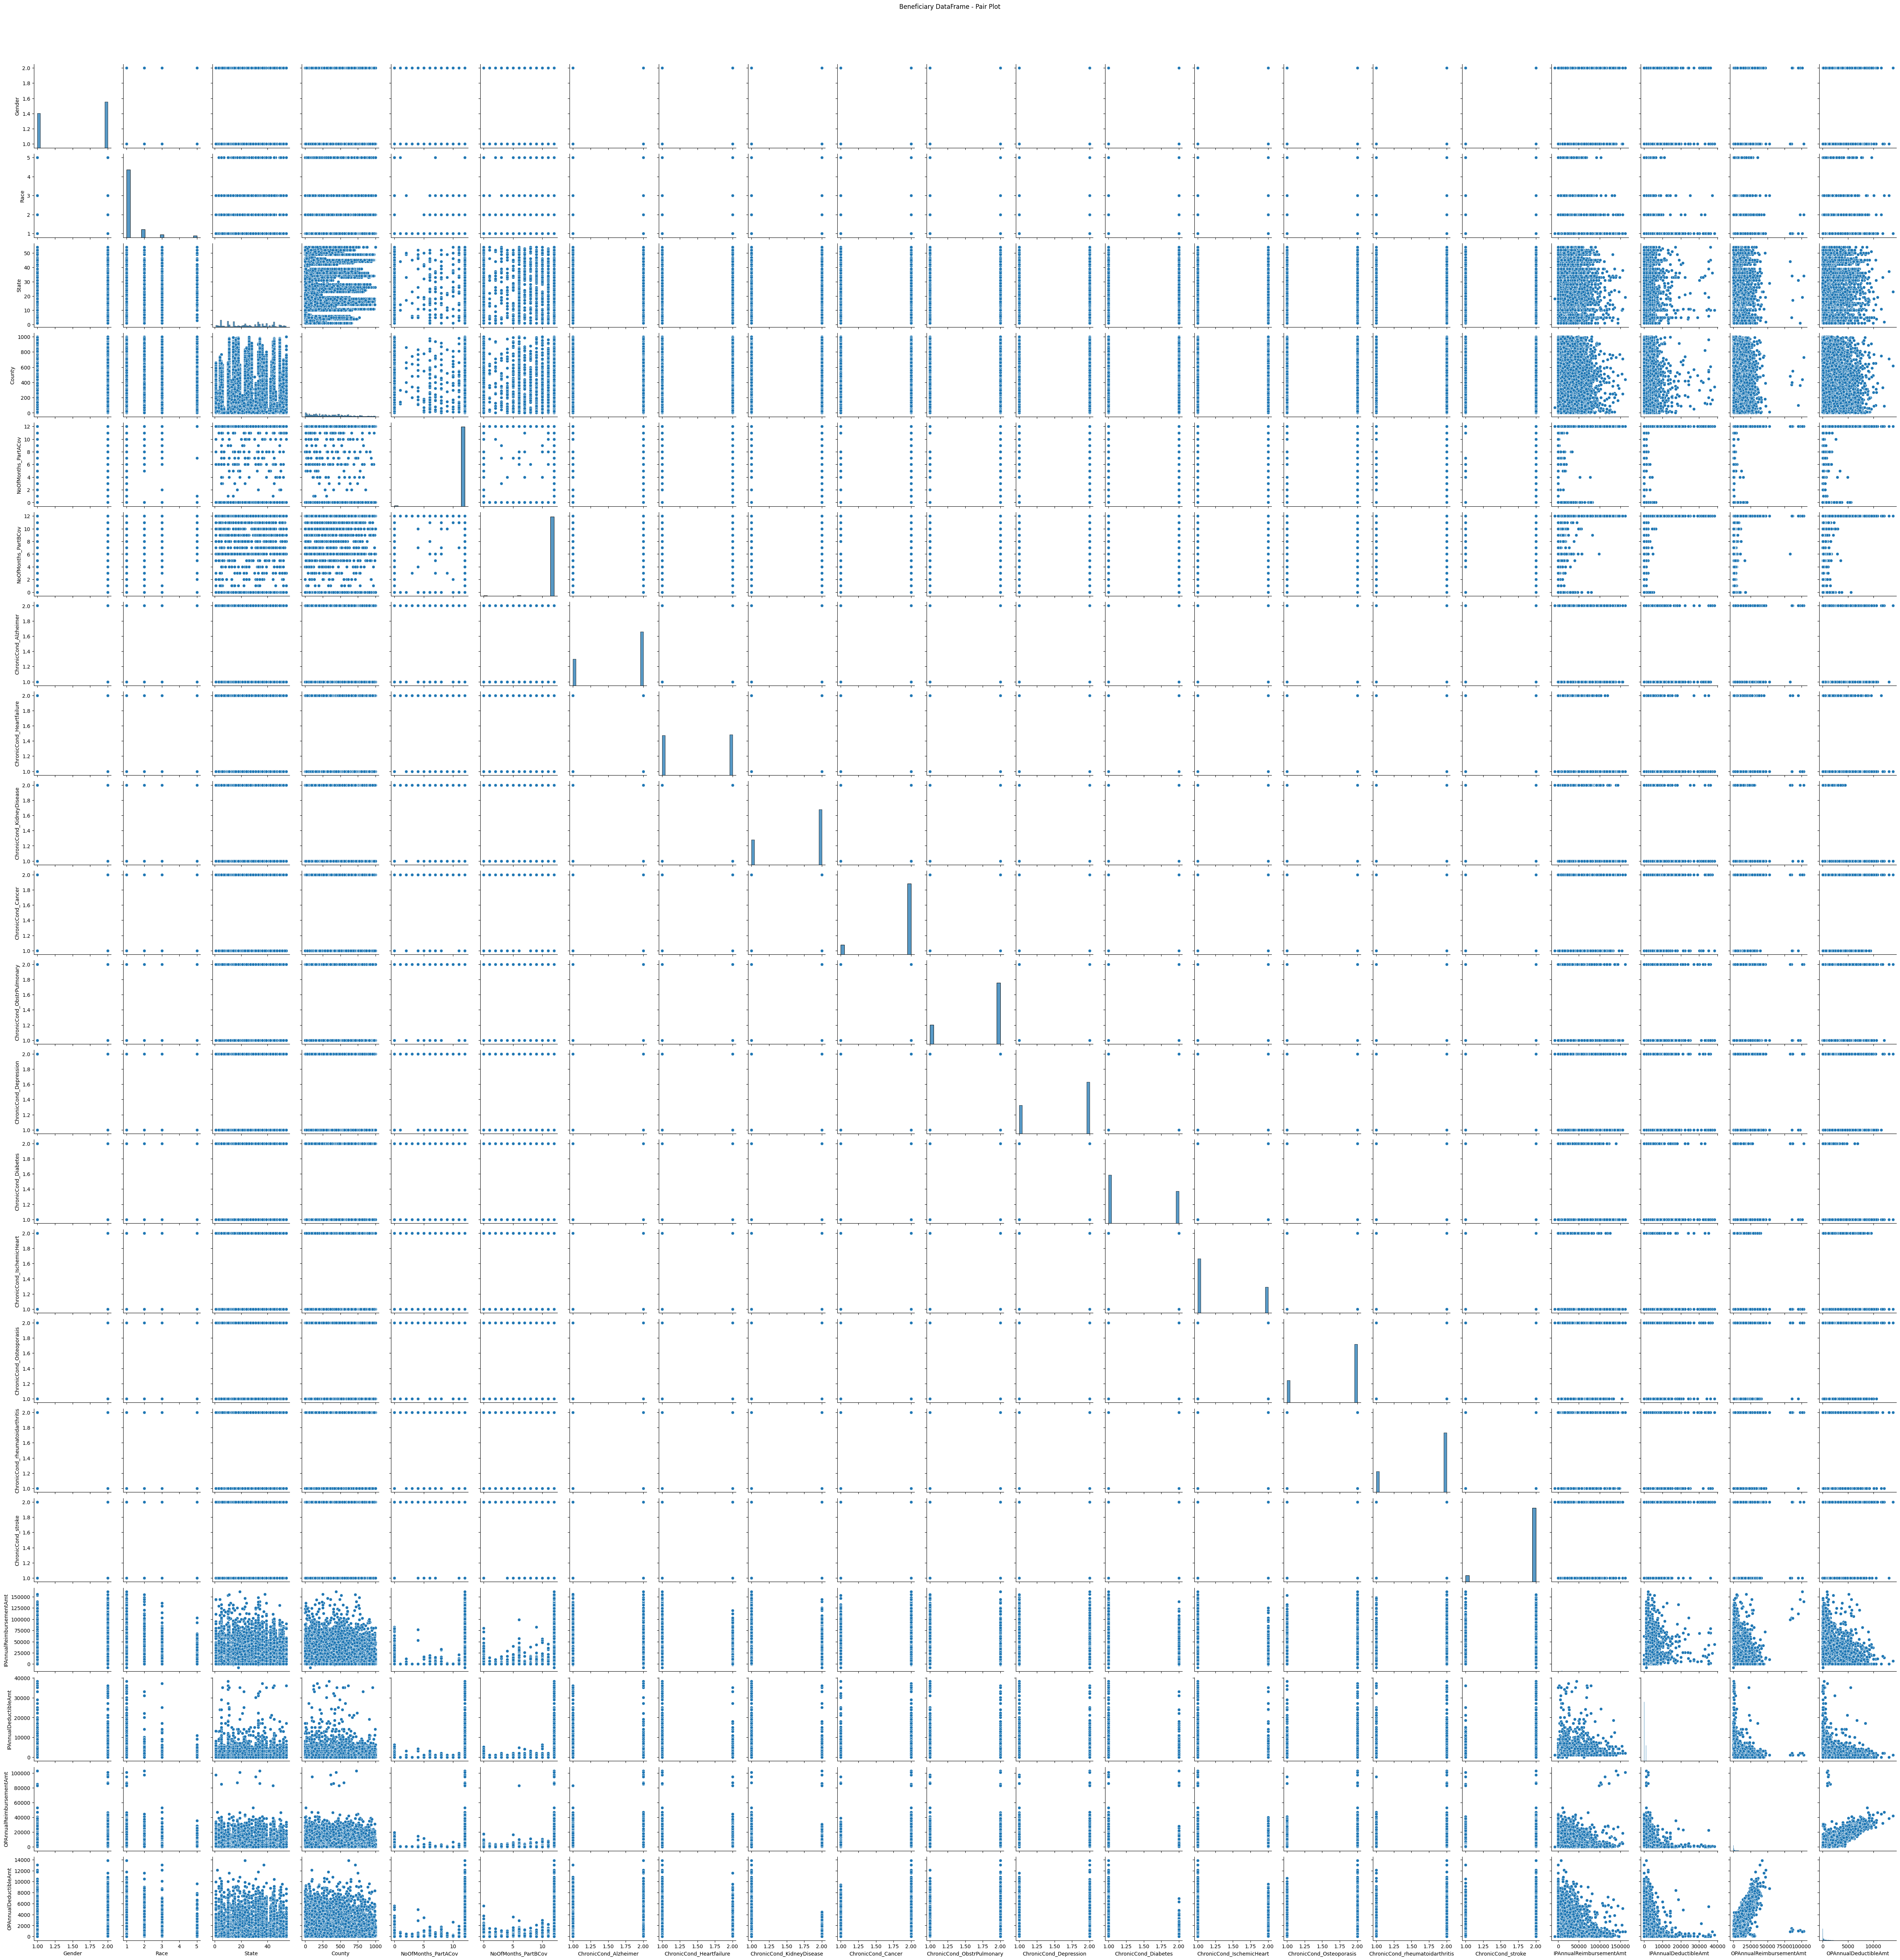

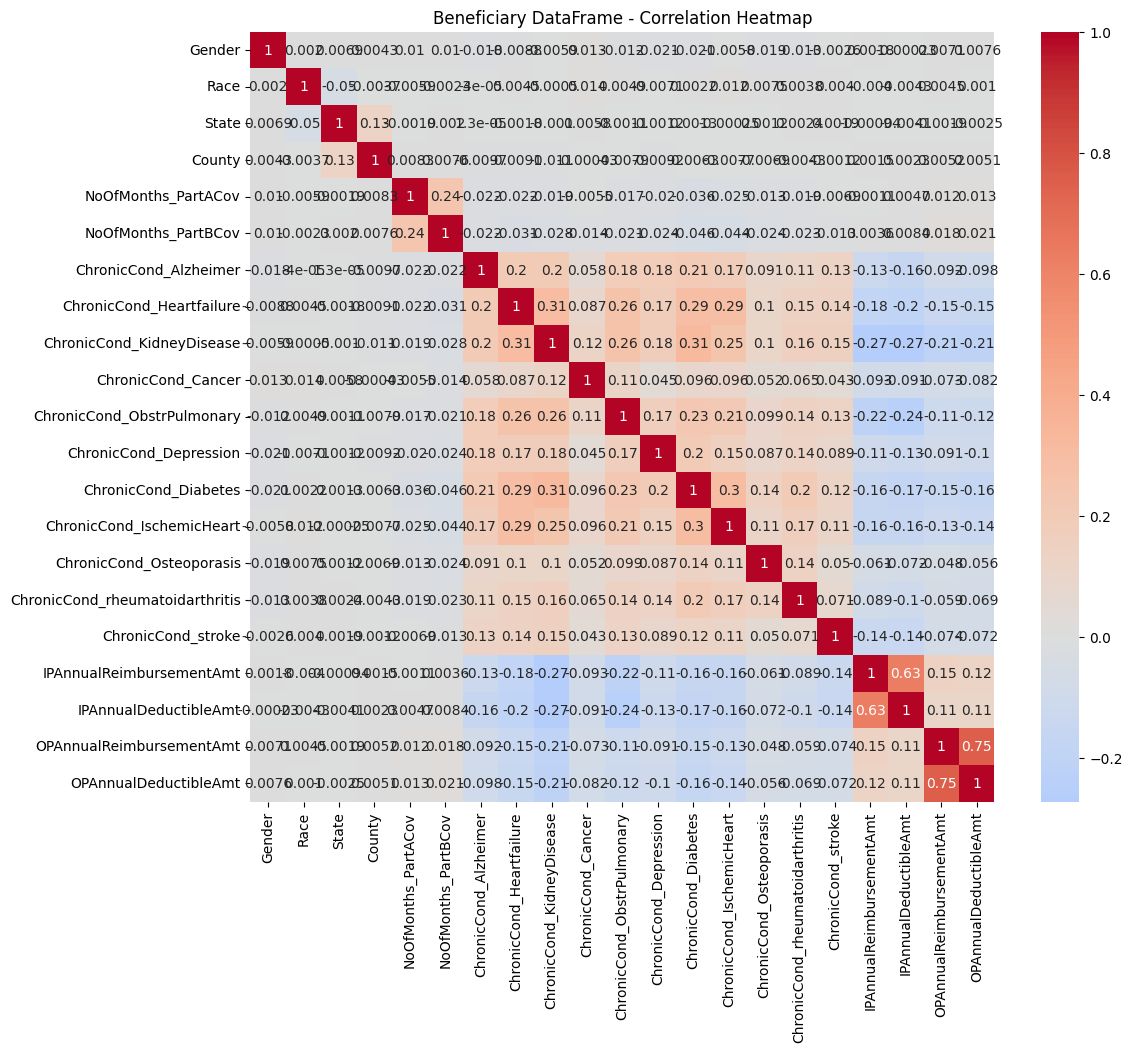

<Figure size 1200x1000 with 0 Axes>

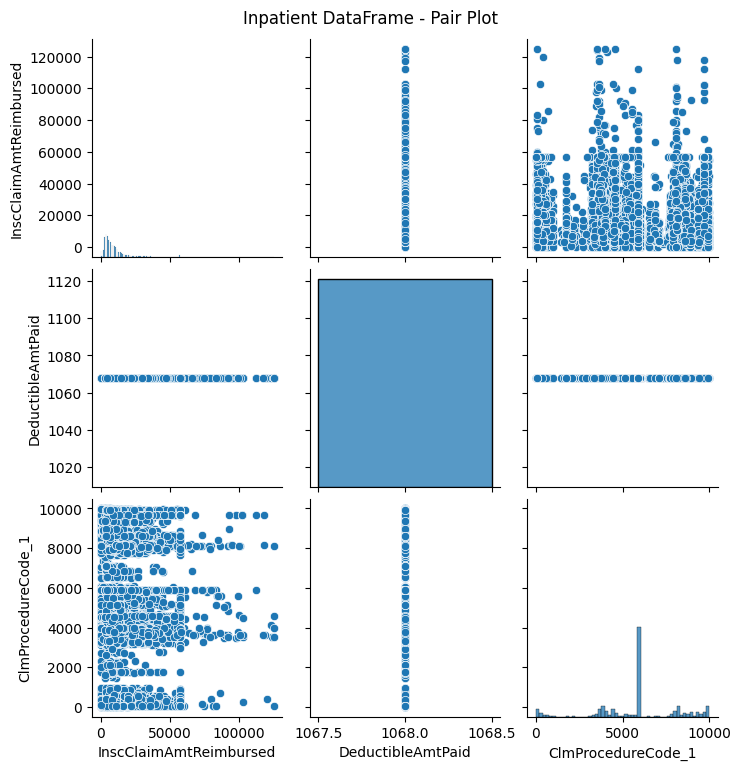

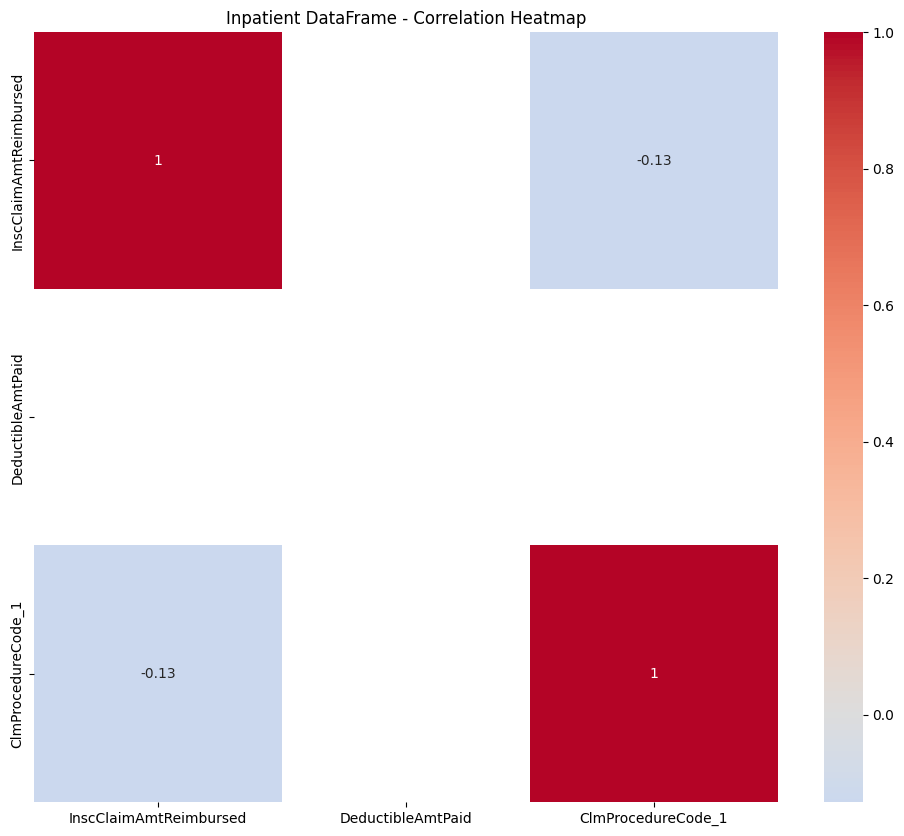

<Figure size 1200x1000 with 0 Axes>

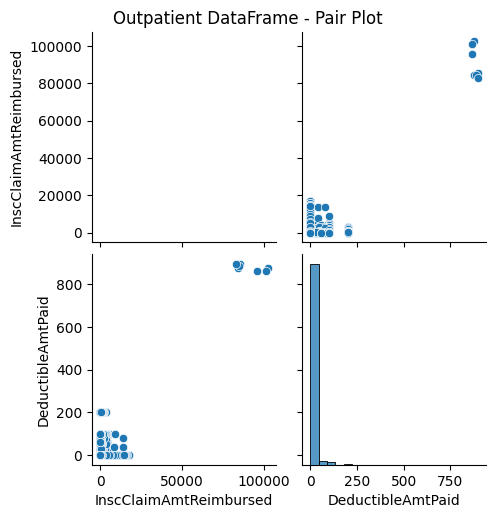

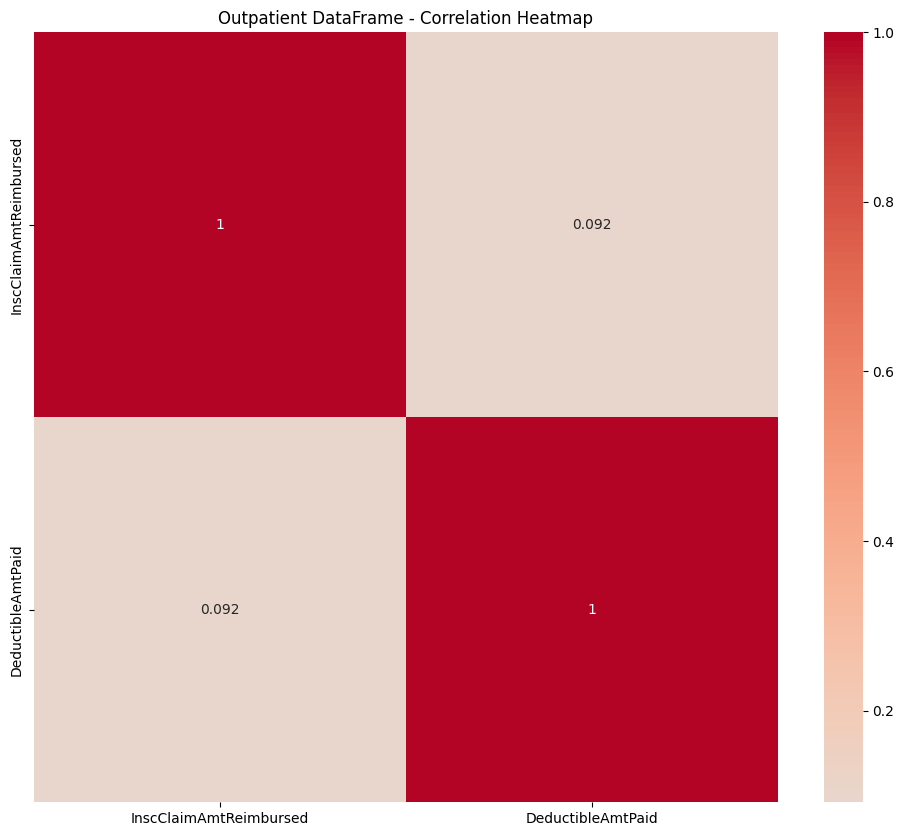

In [24]:
# Scatter plots and correlation coefficients for numerical columns
for name, df in dataframes.items():
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    if len(numerical_columns) > 1:
        plt.figure(figsize=(12, 10))
        sns.pairplot(df[numerical_columns])
        plt.suptitle(f'{name} - Pair Plot', y=1.02)
        plt.show()
        correlation_matrix = df[numerical_columns].corr()
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title(f'{name} - Correlation Heatmap')
        plt.show()


# Cross-Tabulations for Categorical Variables

In [25]:
# Cross-tabulations for categorical columns
for name, df in dataframes.items():
    categorical_columns = df.select_dtypes(include=[object]).columns
    for column in categorical_columns:
        if len(df[column].unique()) <= 10:  # Limiting to columns with <= 10 unique values for better visualization
            print(f"\n{name} - Cross-Tabulation for {column}:")
            cross_tab = pd.crosstab(index=df[column], columns='count')
            print(cross_tab)



Train DataFrame - Cross-Tabulation for PotentialFraud:
col_0           count
PotentialFraud       
No               4904
Yes               506

Beneficiary DataFrame - Cross-Tabulation for RenalDiseaseIndicator:
col_0                   count
RenalDiseaseIndicator        
0                      118978
Y                       19578


# **Multivariate Analysis**

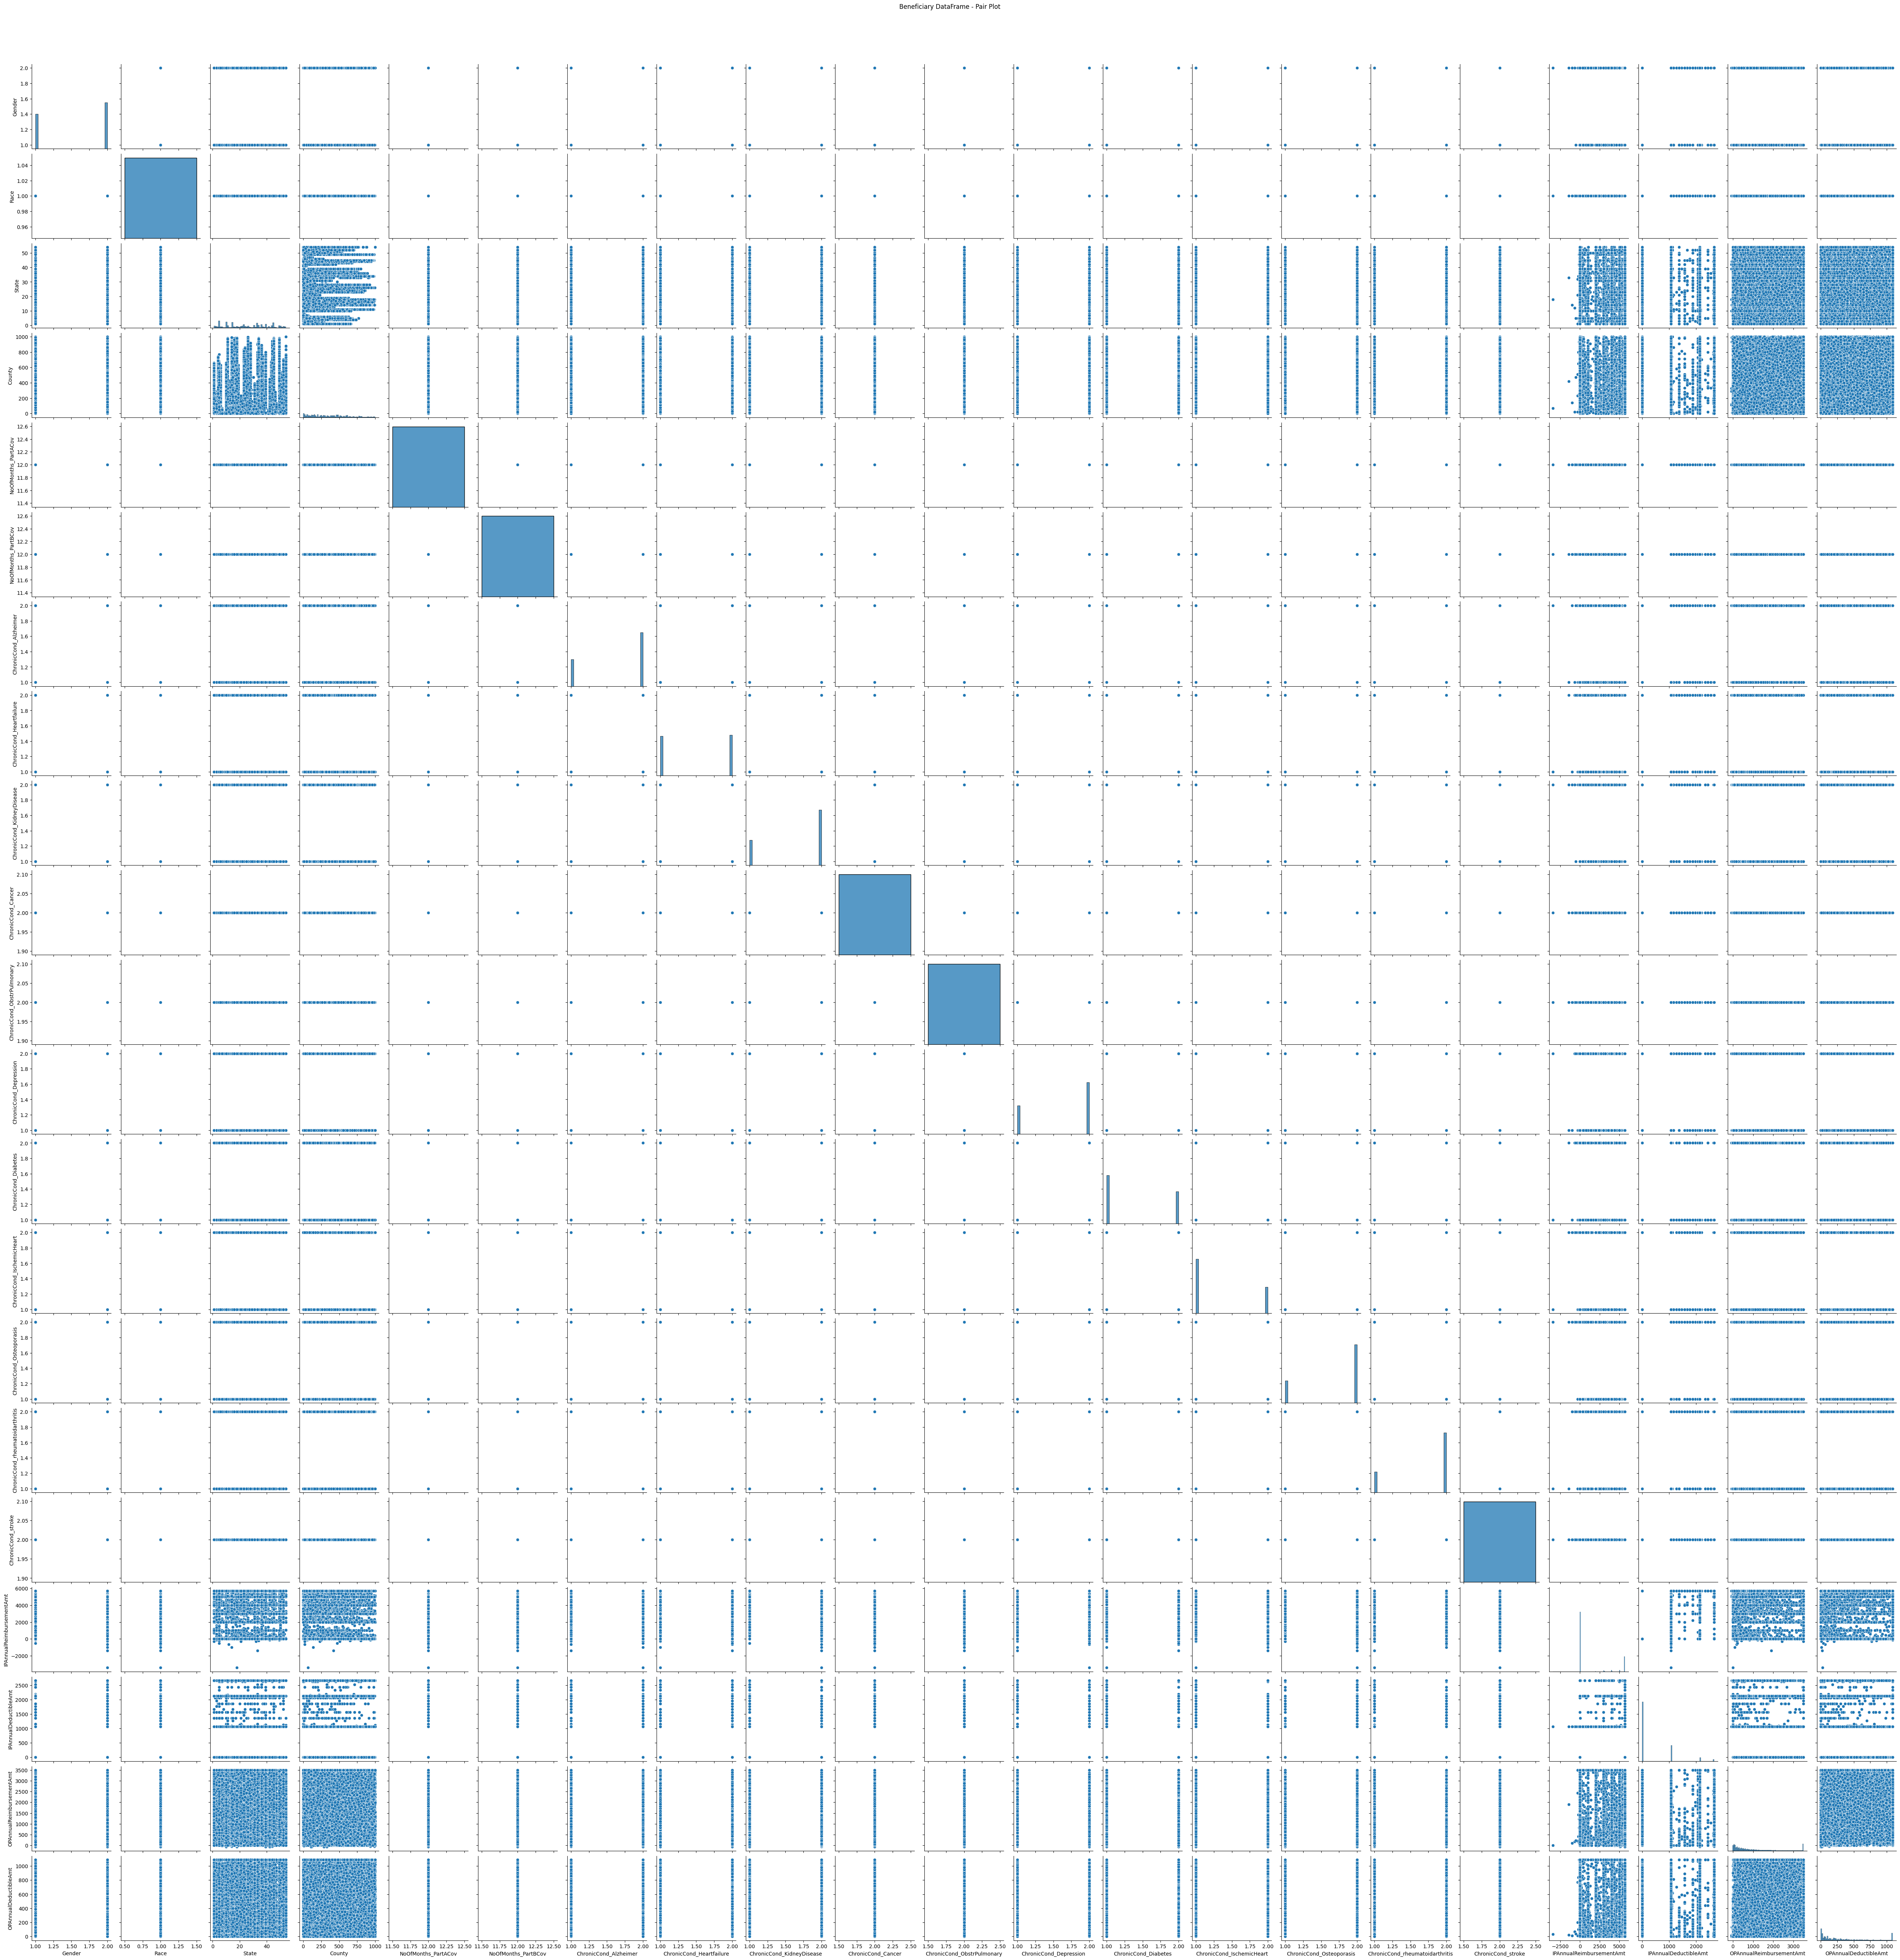

In [26]:
# Pair plots for numerical columns in Beneficiary DataFrame
sns.pairplot(beneficiary_df)
plt.suptitle('Beneficiary DataFrame - Pair Plot', y=1.02)
plt.show()


# **Heatmaps**

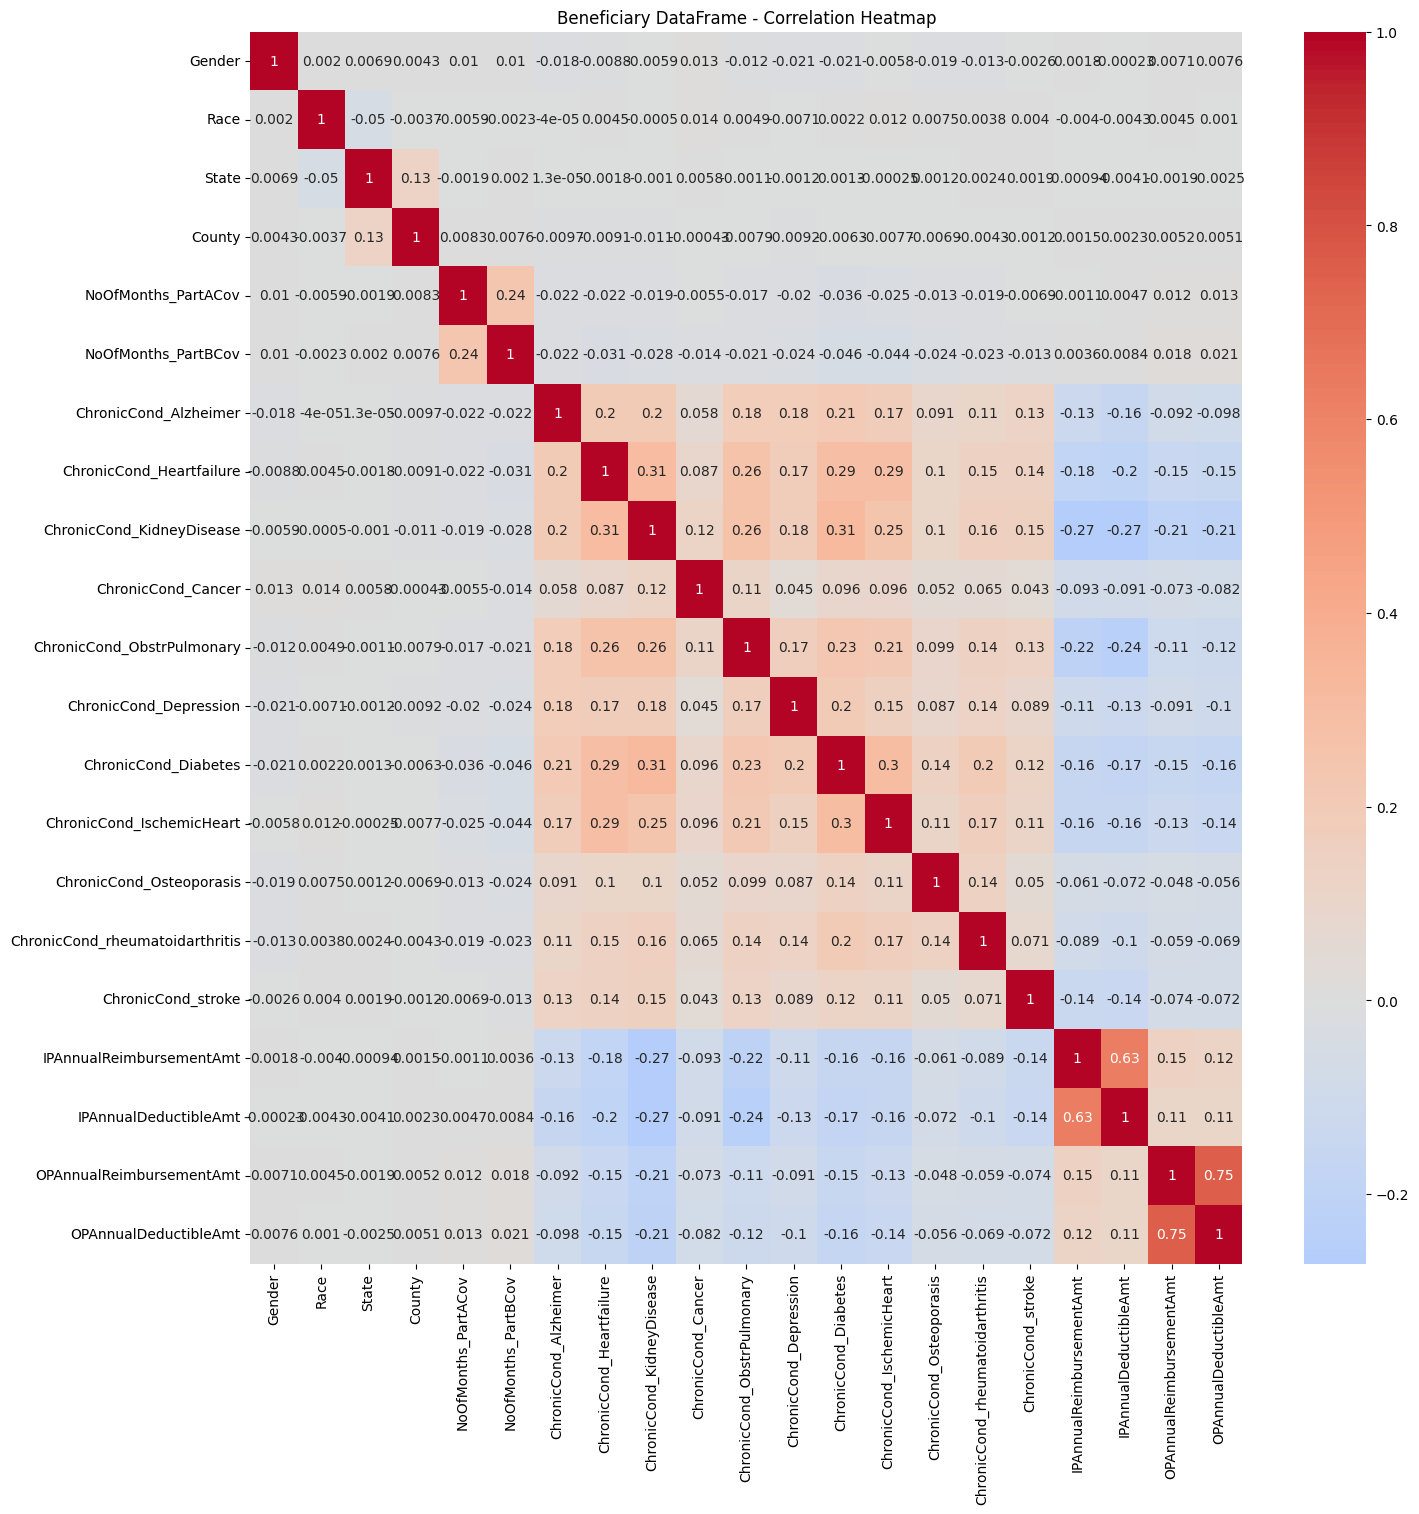

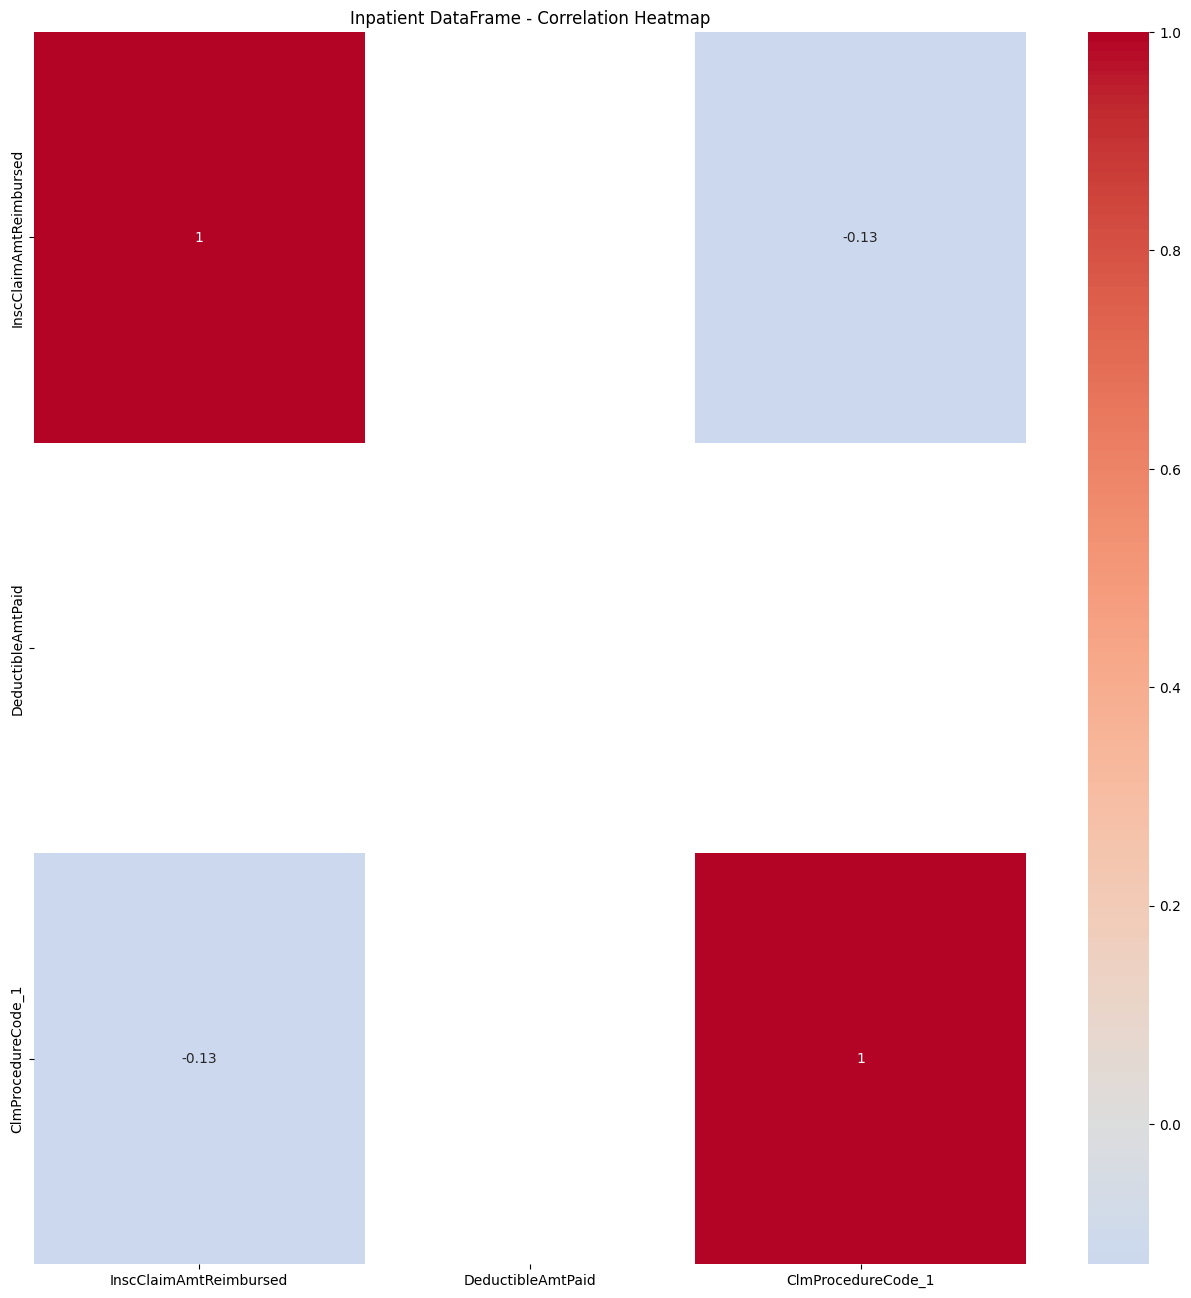

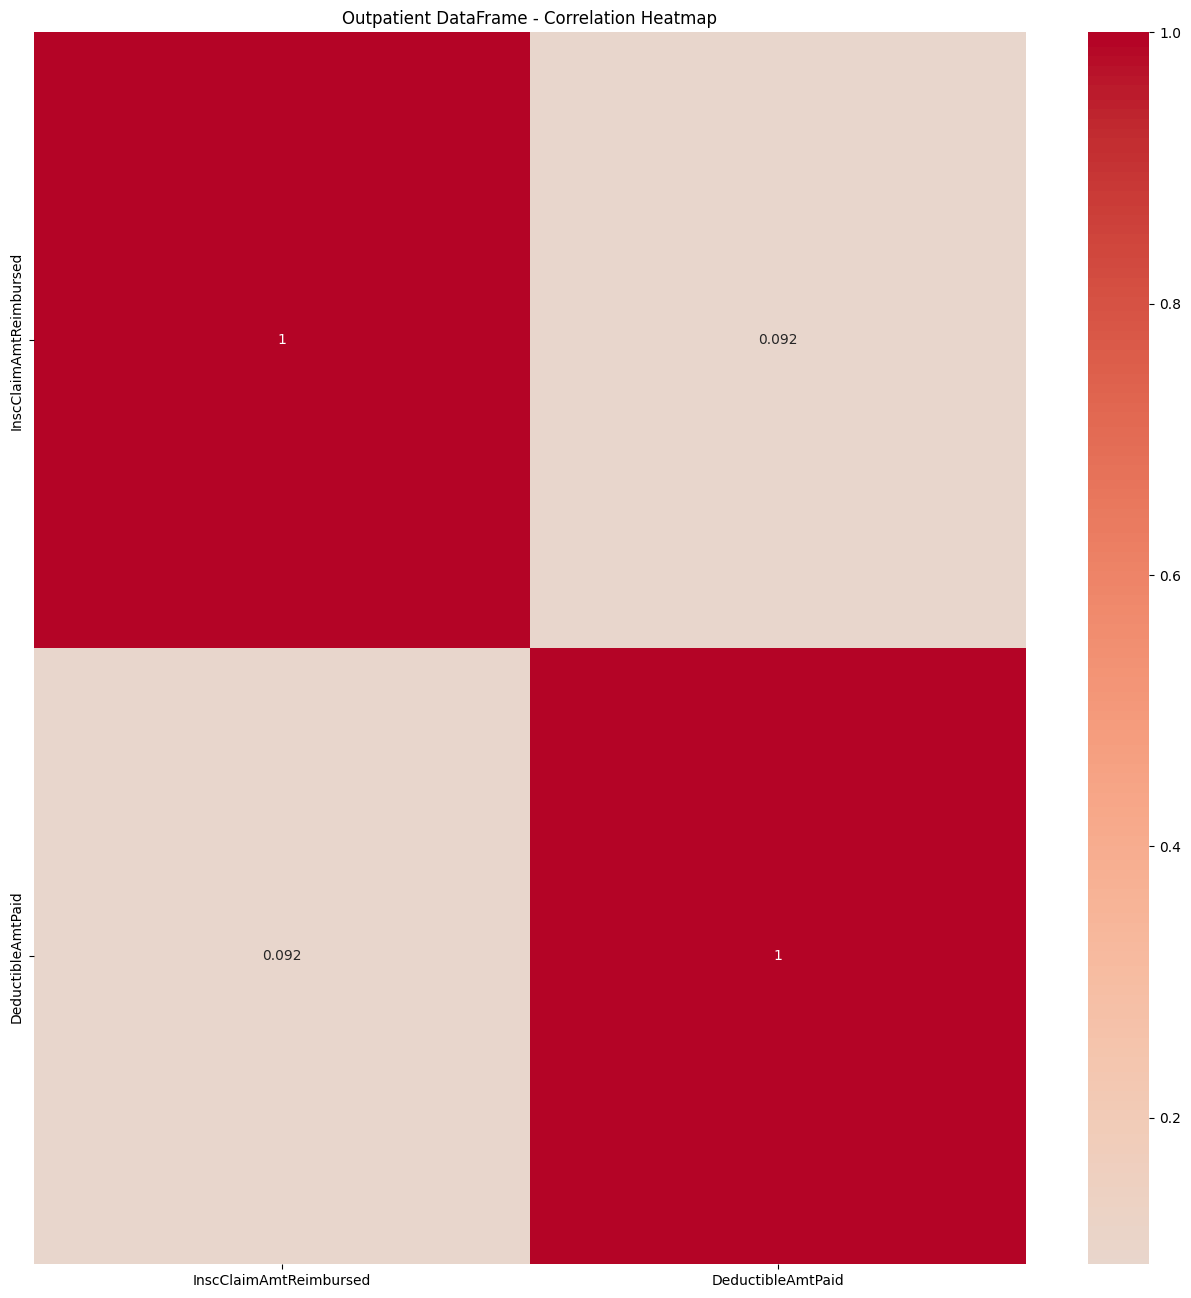

In [27]:
# Heatmaps for correlation matrices of numerical columns
for name, df in dataframes.items():
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    if len(numerical_columns) > 1:
        correlation_matrix = df[numerical_columns].corr()
        plt.figure(figsize=(16, 16))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title(f'{name} - Correlation Heatmap')
        plt.show()


In [28]:
# Create a dictionary of datasets for easy iteration
datasets = {
    "Train Data": train_df,
    "Beneficiary Data": beneficiary_df,
    "Inpatient Data": inpatient_df,
    "Outpatient Data": outpatient_df
}

# Function to calculate and display correlations
def display_correlations(datasets):
    for name, df in datasets.items():
        print(f"\n{name} - Pearson Correlation:\n")

        # Select only numeric columns
        numeric_df = df.select_dtypes(include=[float, int])

        # Check if the dataframe has any numeric columns left
        if numeric_df.empty:
            print(f"{name} has no numeric columns to compute correlation.")
        else:
            print(numeric_df.corr())
            print(f"\n{name} - Spearman Correlation:\n")
            print(numeric_df.corr(method='spearman'))

# Display correlations
display_correlations(datasets)


Train Data - Pearson Correlation:

Train Data has no numeric columns to compute correlation.

Beneficiary Data - Pearson Correlation:

                                   Gender  Race     State    County  \
Gender                           1.000000   NaN  0.006893  0.004328   
Race                                  NaN   NaN       NaN       NaN   
State                            0.006893   NaN  1.000000  0.130760   
County                           0.004328   NaN  0.130760  1.000000   
NoOfMonths_PartACov                   NaN   NaN       NaN       NaN   
NoOfMonths_PartBCov                   NaN   NaN       NaN       NaN   
ChronicCond_Alzheimer           -0.017997   NaN  0.000013 -0.009674   
ChronicCond_Heartfailure        -0.008754   NaN -0.001845 -0.009122   
ChronicCond_KidneyDisease       -0.005936   NaN -0.001041 -0.011088   
ChronicCond_Cancer                    NaN   NaN       NaN       NaN   
ChronicCond_ObstrPulmonary            NaN   NaN       NaN       NaN   
ChronicCond_

In [29]:
# Define correlation threshold
correlation_threshold = 0.5

# Function to calculate and display high correlation pairs
def display_high_correlation_pairs(datasets, threshold=0.5):
    for name, df in datasets.items():
        print(f"\n{name} - High Correlation Pairs (Threshold > {threshold}):\n")

        # Select only numeric columns
        numeric_df = df.select_dtypes(include=[float, int])

        # Check if the dataframe has any numeric columns left
        if numeric_df.empty:
            print(f"{name} has no numeric columns to compute correlation.")
            continue

        # Compute Pearson correlations
        pearson_corr = numeric_df.corr()

        # Filter high correlation pairs
        high_corr_features = pearson_corr[(pearson_corr.abs() > threshold) & (pearson_corr.abs() < 1.0)]

        # Extract high correlation pairs
        high_corr_pairs = {}
        for col in high_corr_features.columns:
            for row in high_corr_features.index:
                if row != col and abs(high_corr_features.loc[row, col]) > threshold:
                    high_corr_pairs[(row, col)] = high_corr_features.loc[row, col]

        if high_corr_pairs:
            for pair, corr_value in high_corr_pairs.items():
                print(f"{pair}: {corr_value:.2f}")
        else:
            print("No pairs with correlation above the threshold.")

# Display high correlation pairs
display_high_correlation_pairs(datasets, threshold=correlation_threshold)


Train Data - High Correlation Pairs (Threshold > 0.5):

Train Data has no numeric columns to compute correlation.

Beneficiary Data - High Correlation Pairs (Threshold > 0.5):

('IPAnnualDeductibleAmt', 'IPAnnualReimbursementAmt'): 0.90
('IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt'): 0.90
('OPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt'): 0.59
('OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt'): 0.59

Inpatient Data - High Correlation Pairs (Threshold > 0.5):

('ClmProcedureCode_5', 'ClmProcedureCode_1'): 0.81
('ClmProcedureCode_1', 'ClmProcedureCode_5'): 0.81

Outpatient Data - High Correlation Pairs (Threshold > 0.5):

No pairs with correlation above the threshold.


# **Visualizations**

Histograms

In [30]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Visualize distribution of a key numeric feature
# plt.figure(figsize=(10, 6))
# sns.histplot(inpatient_data['Age'], kde=True)
# plt.title('Age Distribution in Inpatient Data')
# plt.show()

# # Visualize the relationship between two variables
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Claim_Amount', y='Age', data=inpatient_data)
# plt.title('Claim Amount vs Age')
# plt.show()


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load cleaned data
data_dir = '/content/drive/MyDrive/K2_DataScience'
cleaned_train_file_path = os.path.join(data_dir, 'Cleaned_Train.csv')
cleaned_beneficiary_file_path = os.path.join(data_dir, 'Cleaned_Beneficiary.csv')
cleaned_inpatient_file_path = os.path.join(data_dir, 'Cleaned_Inpatient.csv')
cleaned_outpatient_file_path = os.path.join(data_dir, 'Cleaned_Outpatient.csv')

train_df = pd.read_csv(cleaned_train_file_path)
beneficiary_df = pd.read_csv(cleaned_beneficiary_file_path)
inpatient_df = pd.read_csv(cleaned_inpatient_file_path)
outpatient_df = pd.read_csv(cleaned_outpatient_file_path)

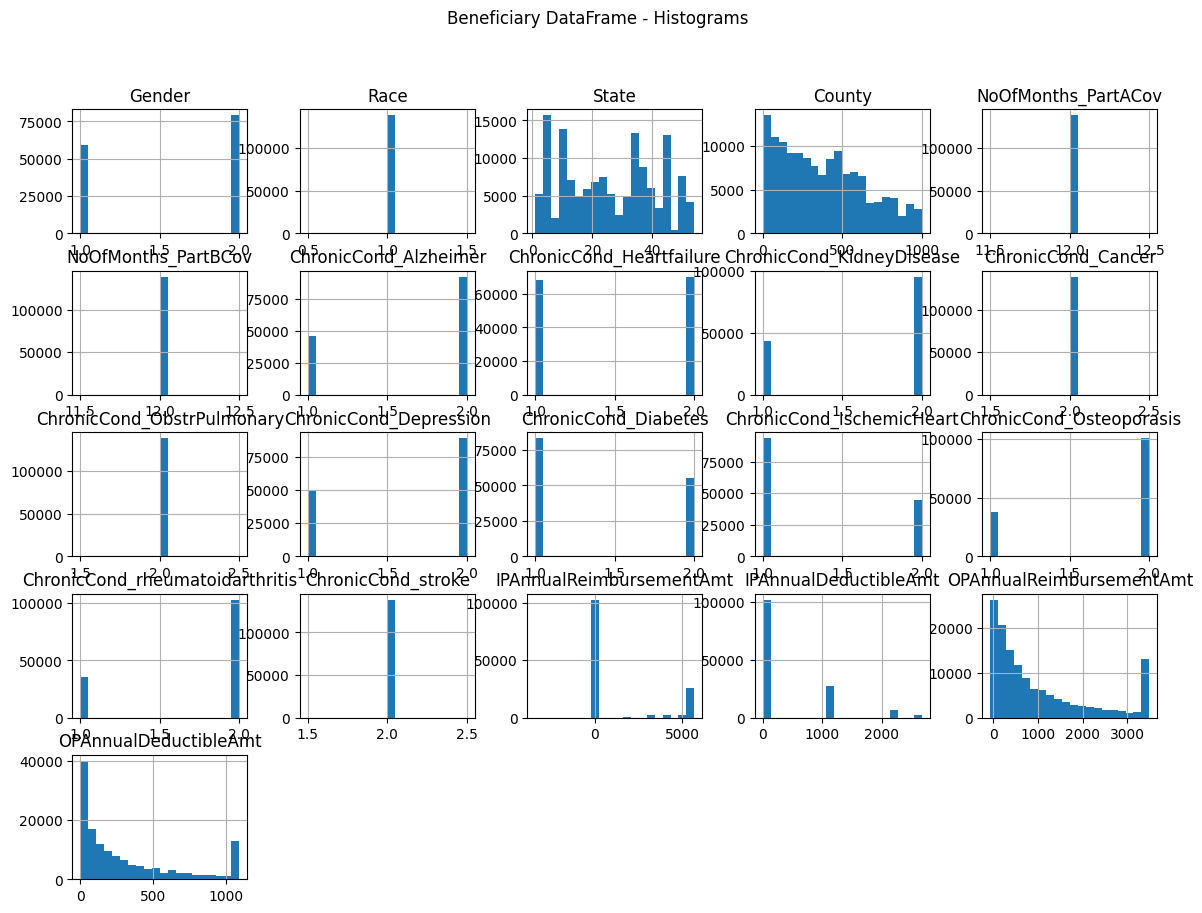

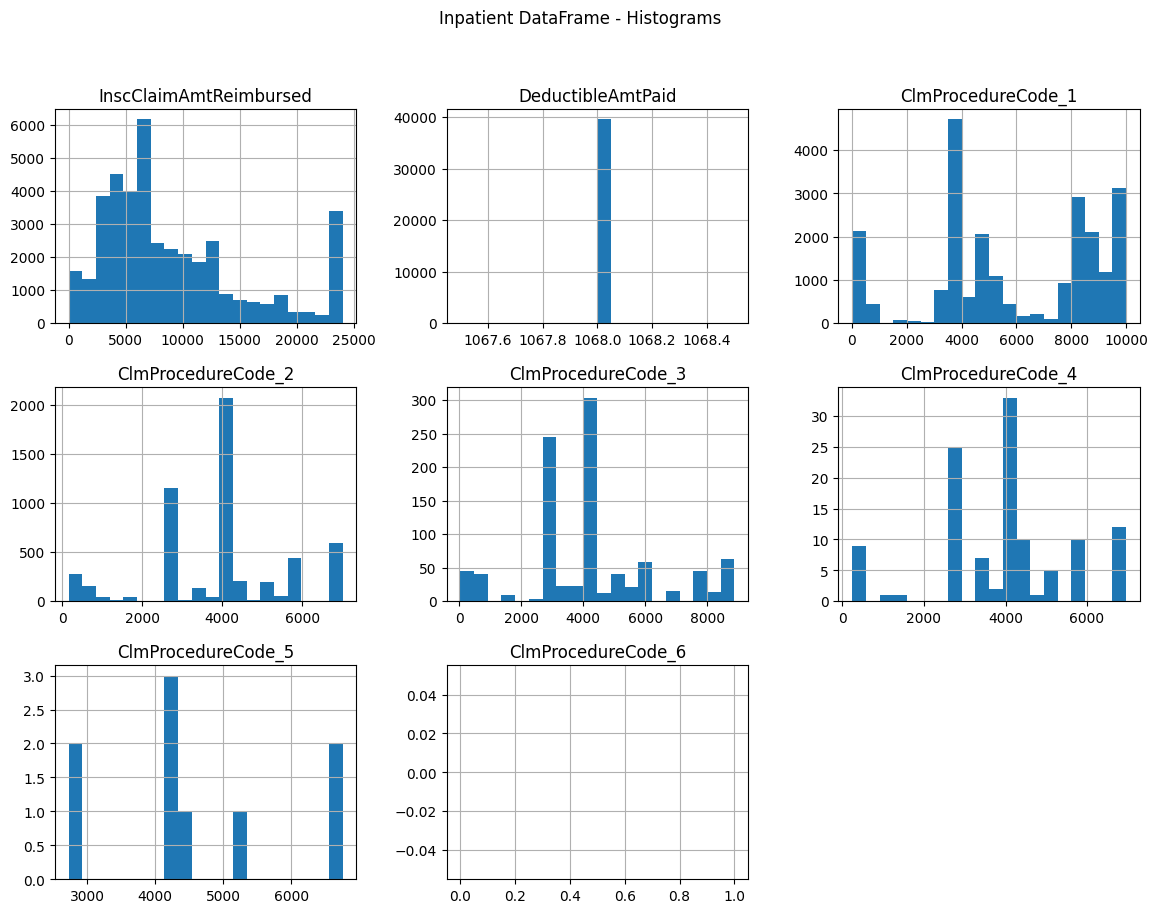

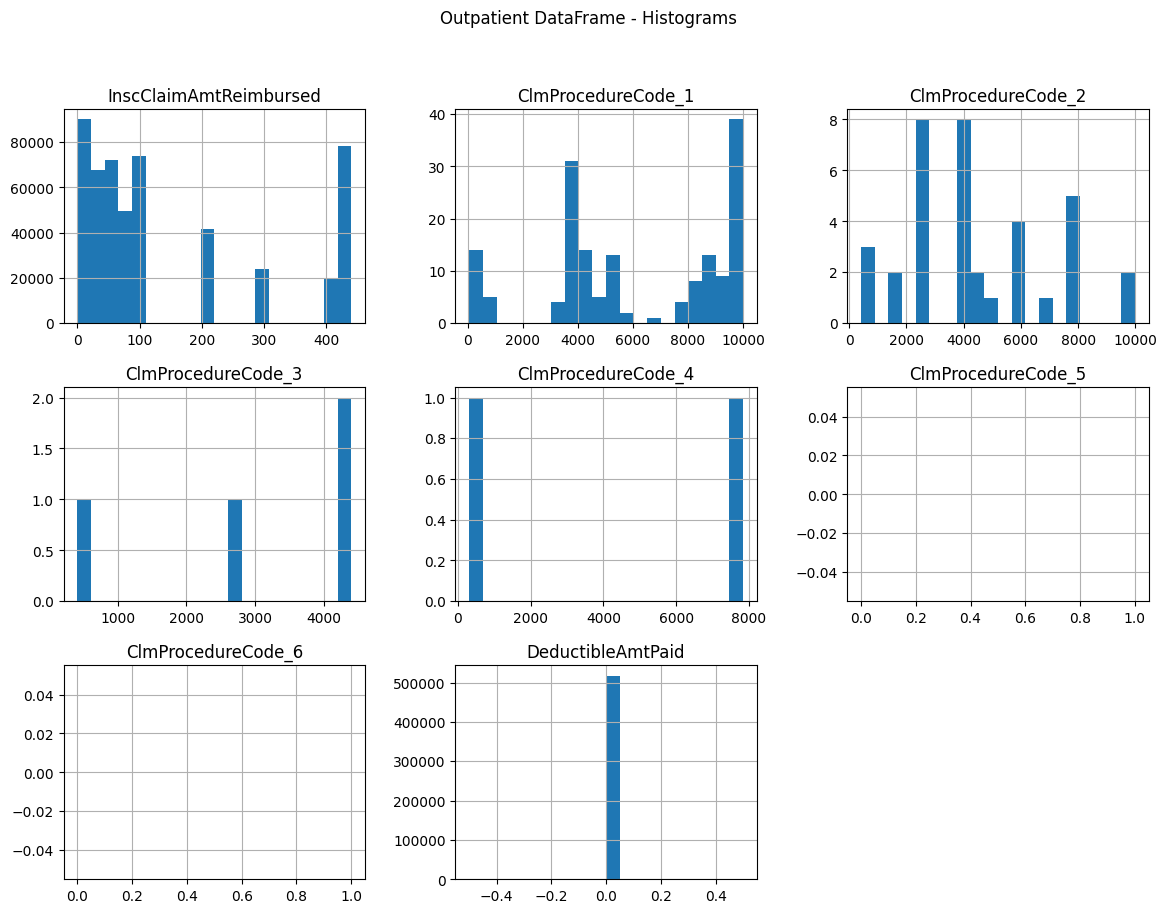

In [32]:
# # Plot histograms for numerical columns in the Train DataFrame
# train_df.hist(bins=20, figsize=(14, 10))
# plt.suptitle('Train DataFrame - Histograms')
# plt.show()

# Plot histograms for numerical columns in the Beneficiary DataFrame
beneficiary_df.hist(bins=20, figsize=(14, 10))
plt.suptitle('Beneficiary DataFrame - Histograms')
plt.show()

# Plot histograms for numerical columns in the Inpatient DataFrame
inpatient_df.hist(bins=20, figsize=(14, 10))
plt.suptitle('Inpatient DataFrame - Histograms')
plt.show()

# Plot histograms for numerical columns in the Outpatient DataFrame
outpatient_df.hist(bins=20, figsize=(14, 10))
plt.suptitle('Outpatient DataFrame - Histograms')
plt.show()


# Box Plots

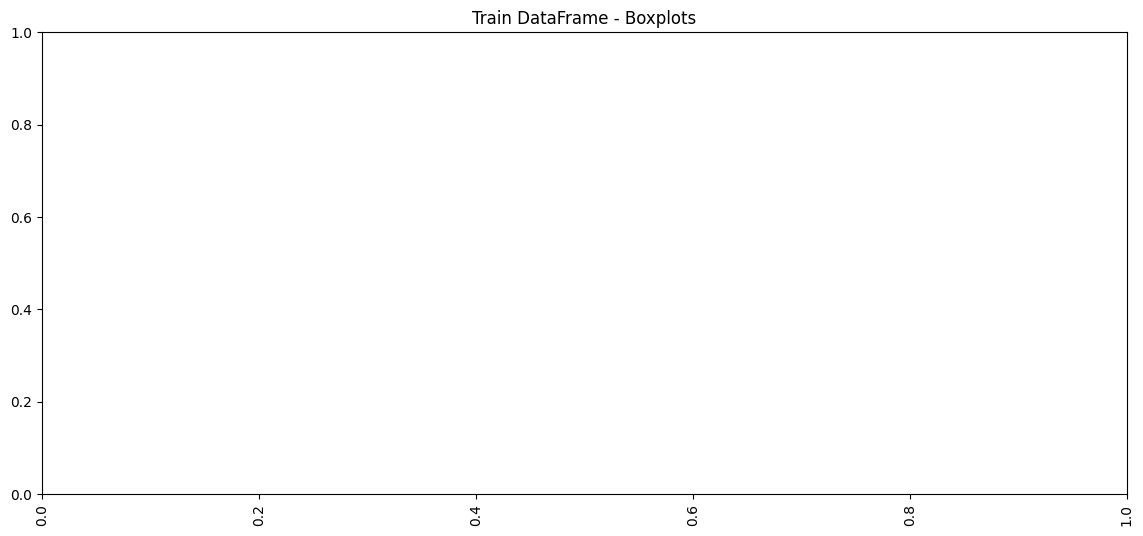

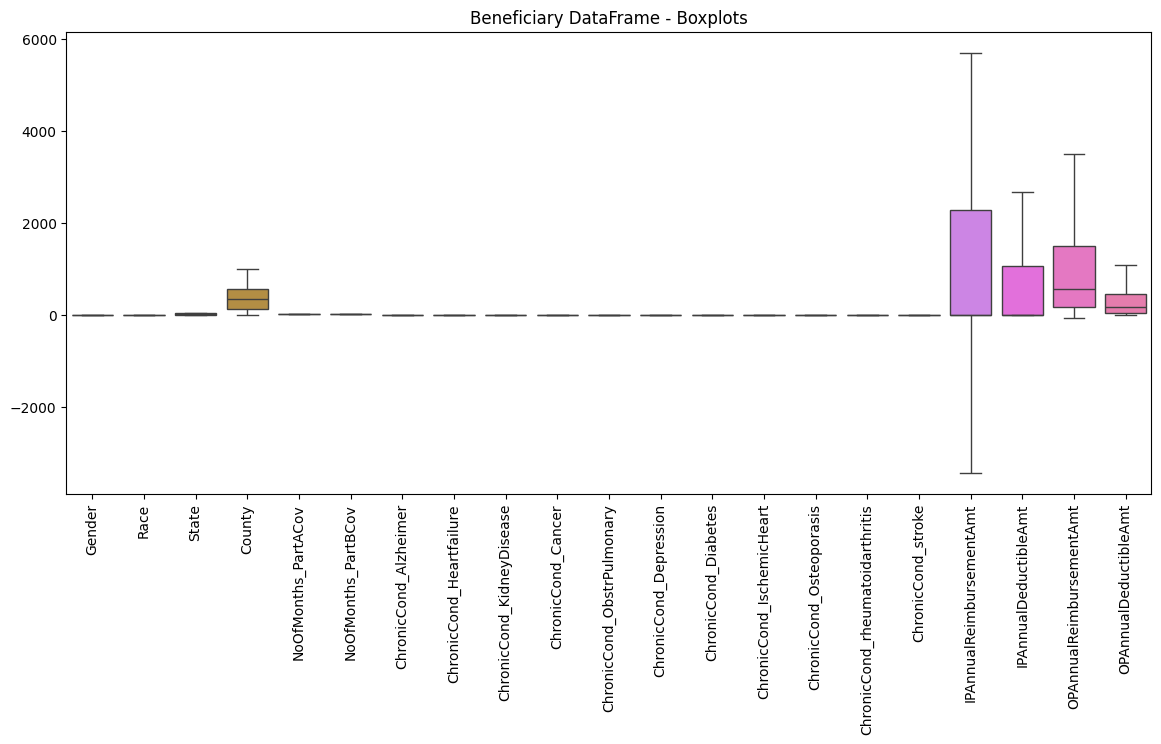

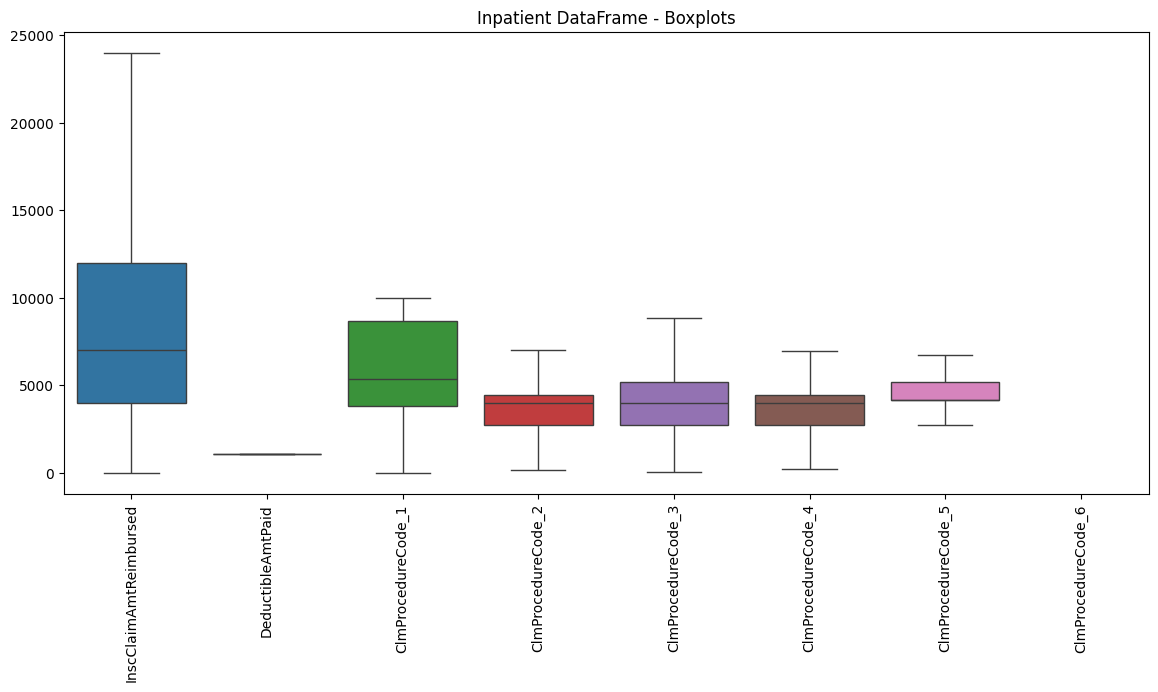

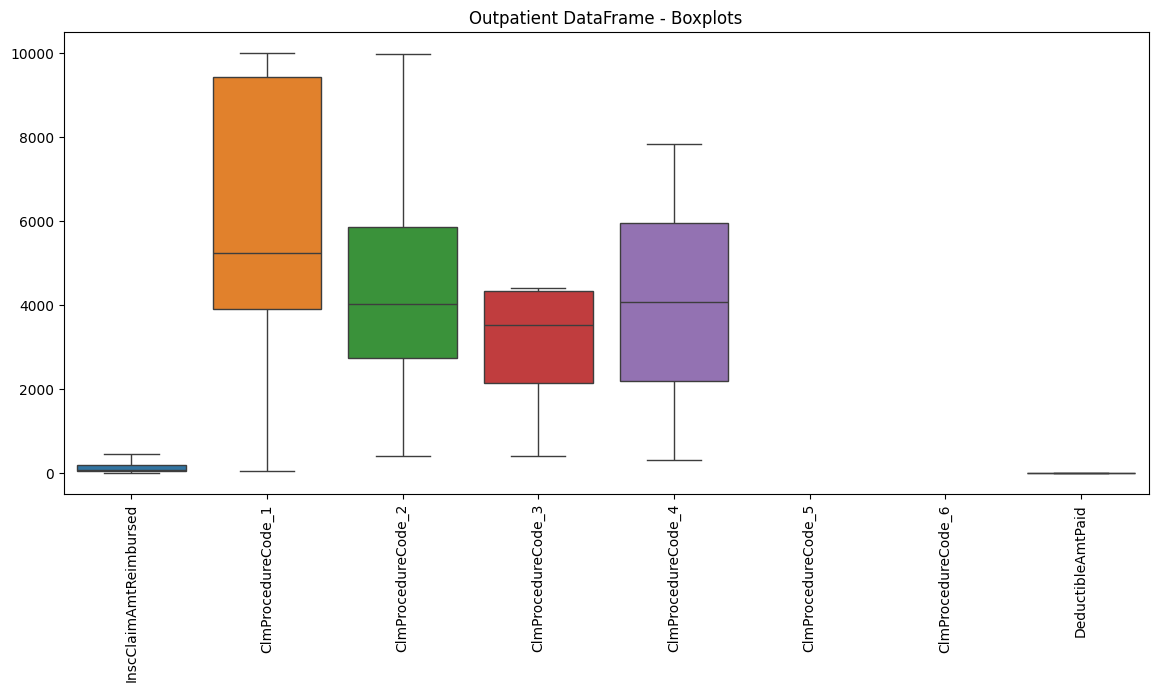

In [33]:
# Plot boxplots for numerical columns in the Train DataFrame
plt.figure(figsize=(14, 6))
sns.boxplot(data=train_df.select_dtypes(include=[np.number]))
plt.title('Train DataFrame - Boxplots')
plt.xticks(rotation=90)
plt.show()

# Plot boxplots for numerical columns in the Beneficiary DataFrame
plt.figure(figsize=(14, 6))
sns.boxplot(data=beneficiary_df.select_dtypes(include=[np.number]))
plt.title('Beneficiary DataFrame - Boxplots')
plt.xticks(rotation=90)
plt.show()

# Plot boxplots for numerical columns in the Inpatient DataFrame
plt.figure(figsize=(14, 6))
sns.boxplot(data=inpatient_df.select_dtypes(include=[np.number]))
plt.title('Inpatient DataFrame - Boxplots')
plt.xticks(rotation=90)
plt.show()

# Plot boxplots for numerical columns in the Outpatient DataFrame
plt.figure(figsize=(14, 6))
sns.boxplot(data=outpatient_df.select_dtypes(include=[np.number]))
plt.title('Outpatient DataFrame - Boxplots')
plt.xticks(rotation=90)
plt.show()


# Scatter Plots

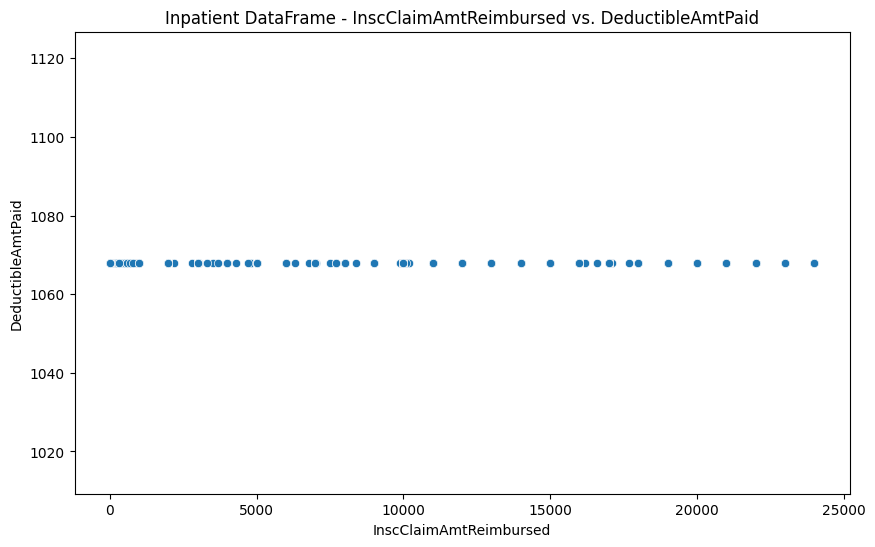

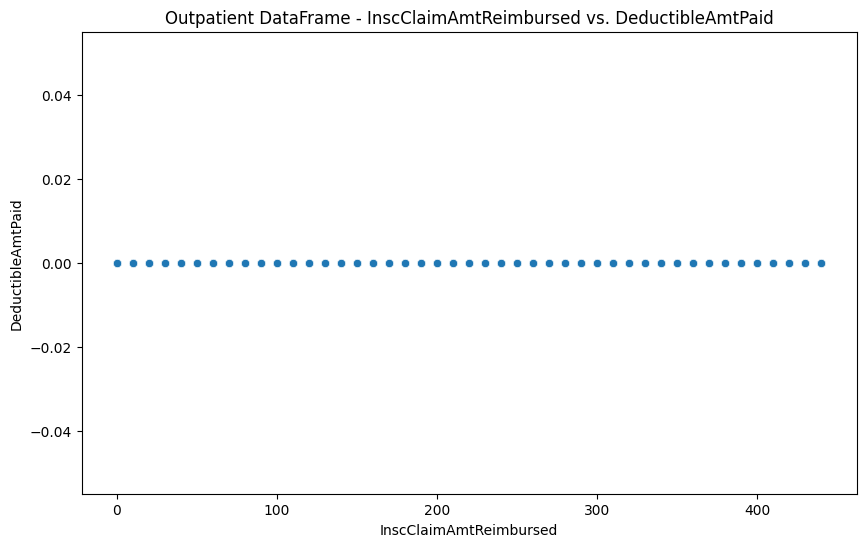

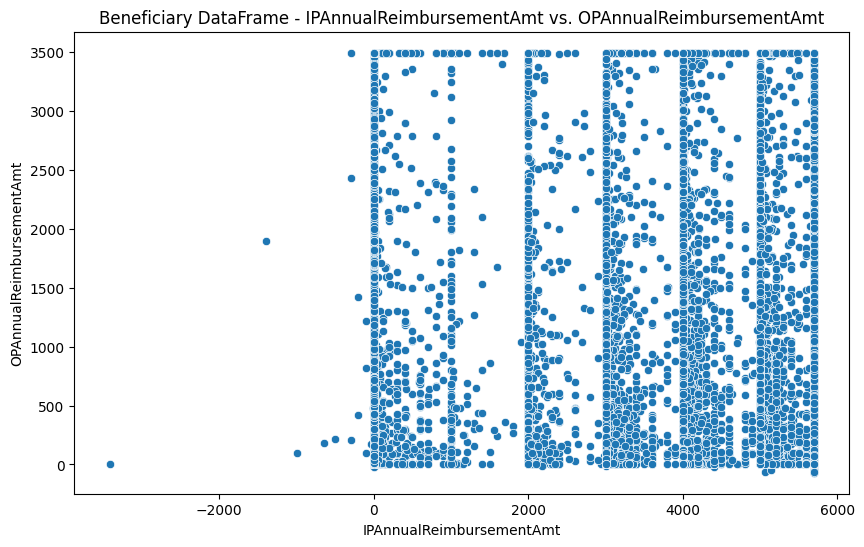

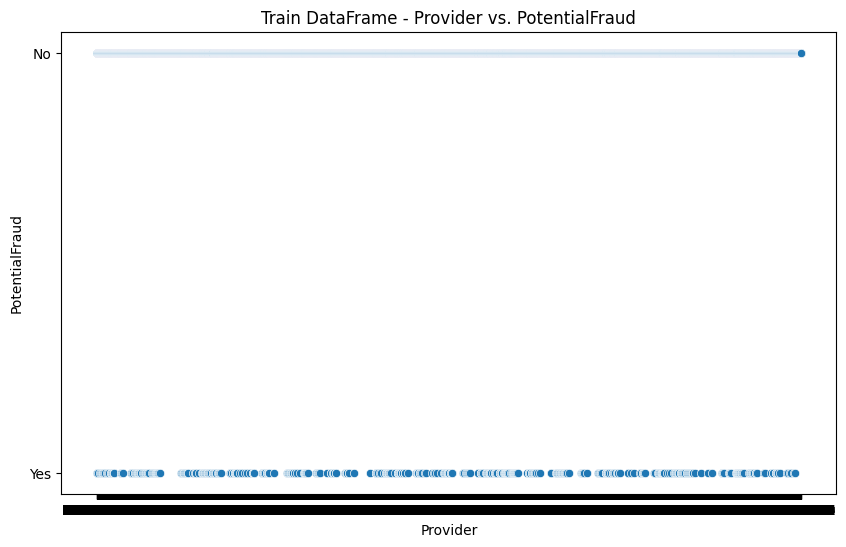

In [34]:
# Scatterplot for Inpatient DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(data=inpatient_df, x='InscClaimAmtReimbursed', y='DeductibleAmtPaid')
plt.title('Inpatient DataFrame - InscClaimAmtReimbursed vs. DeductibleAmtPaid')
plt.show()

# Scatterplot for Outpatient DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(data=outpatient_df, x='InscClaimAmtReimbursed', y='DeductibleAmtPaid')
plt.title('Outpatient DataFrame - InscClaimAmtReimbursed vs. DeductibleAmtPaid')
plt.show()

# Scatterplot for Beneficiary DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(data=beneficiary_df, x='IPAnnualReimbursementAmt', y='OPAnnualReimbursementAmt')
plt.title('Beneficiary DataFrame - IPAnnualReimbursementAmt vs. OPAnnualReimbursementAmt')
plt.show()

# Scatterplot for Train DataFrame (if applicable)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='Provider', y='PotentialFraud')
plt.title('Train DataFrame - Provider vs. PotentialFraud')
plt.show()


# **Model Training**

In [35]:
print(train_df.columns)
print(beneficiary_df.columns)
print(inpatient_df.columns)
print(outpatient_df.columns)


Index(['Provider', 'PotentialFraud'], dtype='object')
Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')
Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnos

In [36]:
# Print column names to check for ClaimID
print("Inpatient DataFrame columns:", inpatient_df.columns)
print("Outpatient DataFrame columns:", outpatient_df.columns)

Inpatient DataFrame columns: Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')
Outpatient DataFrame columns: Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', '

In [37]:
# # Rename ClaimID columns for consistency
# inpatient_df.rename(columns={'ClaimID_inpatient': 'ClaimID'}, inplace=True)
# outpatient_df.rename(columns={'ClaimID_outpatient': 'ClaimID'}, inplace=True)

In [38]:
# # Merge Inpatient and Outpatient DataFrames on ClaimID
# merged_inpatient_outpatient = pd.merge(inpatient_df, outpatient_df, on='ClaimID', how='left')

# # Print the columns of the merged DataFrame to check the results
# print("Merged Inpatient-Outpatient columns:", merged_inpatient_outpatient.columns)



In [39]:


# # Check for duplicate column names
# column_counts = merged_inpatient_outpatient.columns.to_series().value_counts()
# print("Column counts:\n", column_counts)


In [40]:
# # Inspect columns to find the duplicate names
# print(merged_inpatient_outpatient.columns)


In [41]:
import pandas as pd
inpatient_outpatient_merged = pd.merge(inpatient_df, outpatient_df, on='ClaimID', how='outer')

# Rename columns to distinguish between inpatient and outpatient columns
inpatient_outpatient_merged = inpatient_outpatient_merged.rename(columns={
    'BeneID_x': 'BeneID_inpatient',
    'BeneID_y': 'BeneID_outpatient'
})

# Handle cases where both 'BeneID_x' and 'BeneID_y' exist and need to be unified
# If 'BeneID_inpatient' and 'BeneID_outpatient' are the same, you can drop one or merge them
inpatient_outpatient_merged['BeneID'] = inpatient_outpatient_merged['BeneID_inpatient'].combine_first(inpatient_outpatient_merged['BeneID_outpatient'])

# Drop old BeneID columns
inpatient_outpatient_merged = inpatient_outpatient_merged.drop(['BeneID_inpatient', 'BeneID_outpatient'], axis=1)

# Merge with beneficiary DataFrame on unified BeneID
final_merged_df = pd.merge(beneficiary_df, inpatient_outpatient_merged, on='BeneID', how='left')

# Check final DataFrame
print(final_merged_df.head())



# Check available columns in the final merged DataFrame
print("Available columns:", final_merged_df.columns)


# Feature Selection (Example)
features = ['ClaimID', 'ClaimStartDt_inpatient', 'ClaimEndDt_inpatient', 'InscClaimAmtReimbursed_inpatient',
            'ClmDiagnosisCode_1_inpatient', 'ClmDiagnosisCode_2_inpatient', 'ClmProcedureCode_1_inpatient',
            'ClaimStartDt_outpatient', 'ClaimEndDt_outpatient', 'InscClaimAmtReimbursed_outpatient',
            'ClmDiagnosisCode_1_outpatient', 'ClmProcedureCode_1_outpatient', 'BeneID']











      BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN     1.0   1.0                     0   39.0   
1  BENE11001  1943-01-01  NaN     1.0   1.0                     0   39.0   
2  BENE11001  1943-01-01  NaN     1.0   1.0                     0   39.0   
3  BENE11002  1936-09-01  NaN     2.0   1.0                     0   39.0   
4  BENE11003  1936-08-01  NaN     1.0   1.0                     0   52.0   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0   230.0                 12.0                 12.0  ...   
1   230.0                 12.0                 12.0  ...   
2   230.0                 12.0                 12.0  ...   
3   280.0                 12.0                 12.0  ...   
4   590.0                 12.0                 12.0  ...   

   ClmDiagnosisCode_9_y  ClmDiagnosisCode_10_y  ClmProcedureCode_1_y  \
0                   NaN                    NaN                   NaN   
1                   NaN               

In [42]:
# Print any missing features
missing_features = [col for col in features if col not in final_merged_df.columns]
if missing_features:
    print("Missing features:", missing_features)
else:
    print("All features are present.")

# If missing features, adjust the list or fill in missing columns
# Example: Add missing columns with default values if necessary
final_merged_df = final_merged_df.reindex(columns=features, fill_value=0)

# Now select relevant features
final_merged_df = final_merged_df[features]

# Handle missing values if necessary
final_merged_df = final_merged_df.fillna(0)

# Save final merged DataFrame
final_merged_df.to_csv('final_merged_data.csv', index=False)

Missing features: ['ClaimStartDt_inpatient', 'ClaimEndDt_inpatient', 'InscClaimAmtReimbursed_inpatient', 'ClmDiagnosisCode_1_inpatient', 'ClmDiagnosisCode_2_inpatient', 'ClmProcedureCode_1_inpatient', 'ClaimStartDt_outpatient', 'ClaimEndDt_outpatient', 'InscClaimAmtReimbursed_outpatient', 'ClmDiagnosisCode_1_outpatient', 'ClmProcedureCode_1_outpatient']


In [1]:
target = 'InscClaimAmtReimbursed_total'


In [43]:
from sklearn.model_selection import train_test_split

X = final_merged_df.drop(columns=[target])  # Features
y = final_merged_df[target]  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


KeyError: "['InscClaimAmtReimbursed_total'] not found in axis"